# Plot $R^2$ vs. $\rho$

<hr/>

#### Imports

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

#### Constants

In [2]:
DATA_FOLDER = '../../../data/generated_by_notebooks/'
PLOT_FOLDER = './plots/predictive_vs_uncertainty/'

#### Settings

In [3]:
mpl.rcParams['figure.dpi'] = 200

algorithm_names = ['RF', 'XGB', 'SVM', 'Shallow', 'Deep']

descriptor_names = ['MACCS', 'ECFC', 'RDKit', 'CDDD']

# Names of the datasets that were already run
dataset_names = [
    'tetrahymena',
    'freesolv',
    'esol',
    'MMP2',
    'IL4',
    'F7',
    'O60674',
    'O14965',
    'P03372',
    'P04150',
    'P06401',
    'P11229',
    'P12931',
    'P16581',
    'P17252',
    'P18089',
    'P19327',
    'P21554',
    'P24530',
    'P25929',
    'P28335',
    'P28482',
    'P35968',
    'P41594',
    'P42345',
    'P47871',
    'P49146',
    'P61169',
    'Q05397',
    'Q16602',
    'P24941',
    'Q92731'
]

#### Functions

In [4]:
def load_evaluation_matrix(name, evaluation='predictive', to_matrix=True):
    """Loads performance table for a single dataset."""
    path = f'{DATA_FOLDER}/{evaluation}_performances/{name}.csv'
    df = pd.read_csv(path, sep=';').set_index('descriptor')
    if to_matrix:
        matrix = df.to_numpy()
        return matrix
    else:
        return df

<hr/>

#### Collect

In [5]:
complete_overview = pd.DataFrame()

names = list()
descs = list()
models = list()
r2_values = list()
rho_values = list()

for name in dataset_names:
    r2_df = load_evaluation_matrix(name, evaluation='predictive', to_matrix=False)
    rho_df = load_evaluation_matrix(name, evaluation='uncertainty', to_matrix=False)
    for model in algorithm_names:
        for desc in descriptor_names:
            names.append(name)
            descs.append(desc)
            models.append(model)
            r2_values.append(r2_df[model][desc])
            rho_values.append(rho_df[model][desc])

complete_overview['name'] = names
complete_overview['model'] = models
complete_overview['descriptor'] = descs
complete_overview['r2'] = r2_values
complete_overview['rho'] = rho_values

complete_overview

,name,model,descriptor,r2,rho
0,tetrahymena,RF,MACCS,0.758729,0.462919
1,tetrahymena,RF,ECFC,0.735419,0.485470
2,tetrahymena,RF,RDKit,0.800332,0.517497
3,tetrahymena,RF,CDDD,0.760442,0.480404
4,tetrahymena,XGB,MACCS,0.816107,0.476313
...,...,...,...,...,...
635,Q92731,Shallow,CDDD,0.672932,0.309707
636,Q92731,Deep,MACCS,0.577660,0.306756
637,Q92731,Deep,ECFC,0.634248,0.295696
638,Q92731,Deep,RDKit,0.625924,0.332404


<hr/>

#### Plot pure

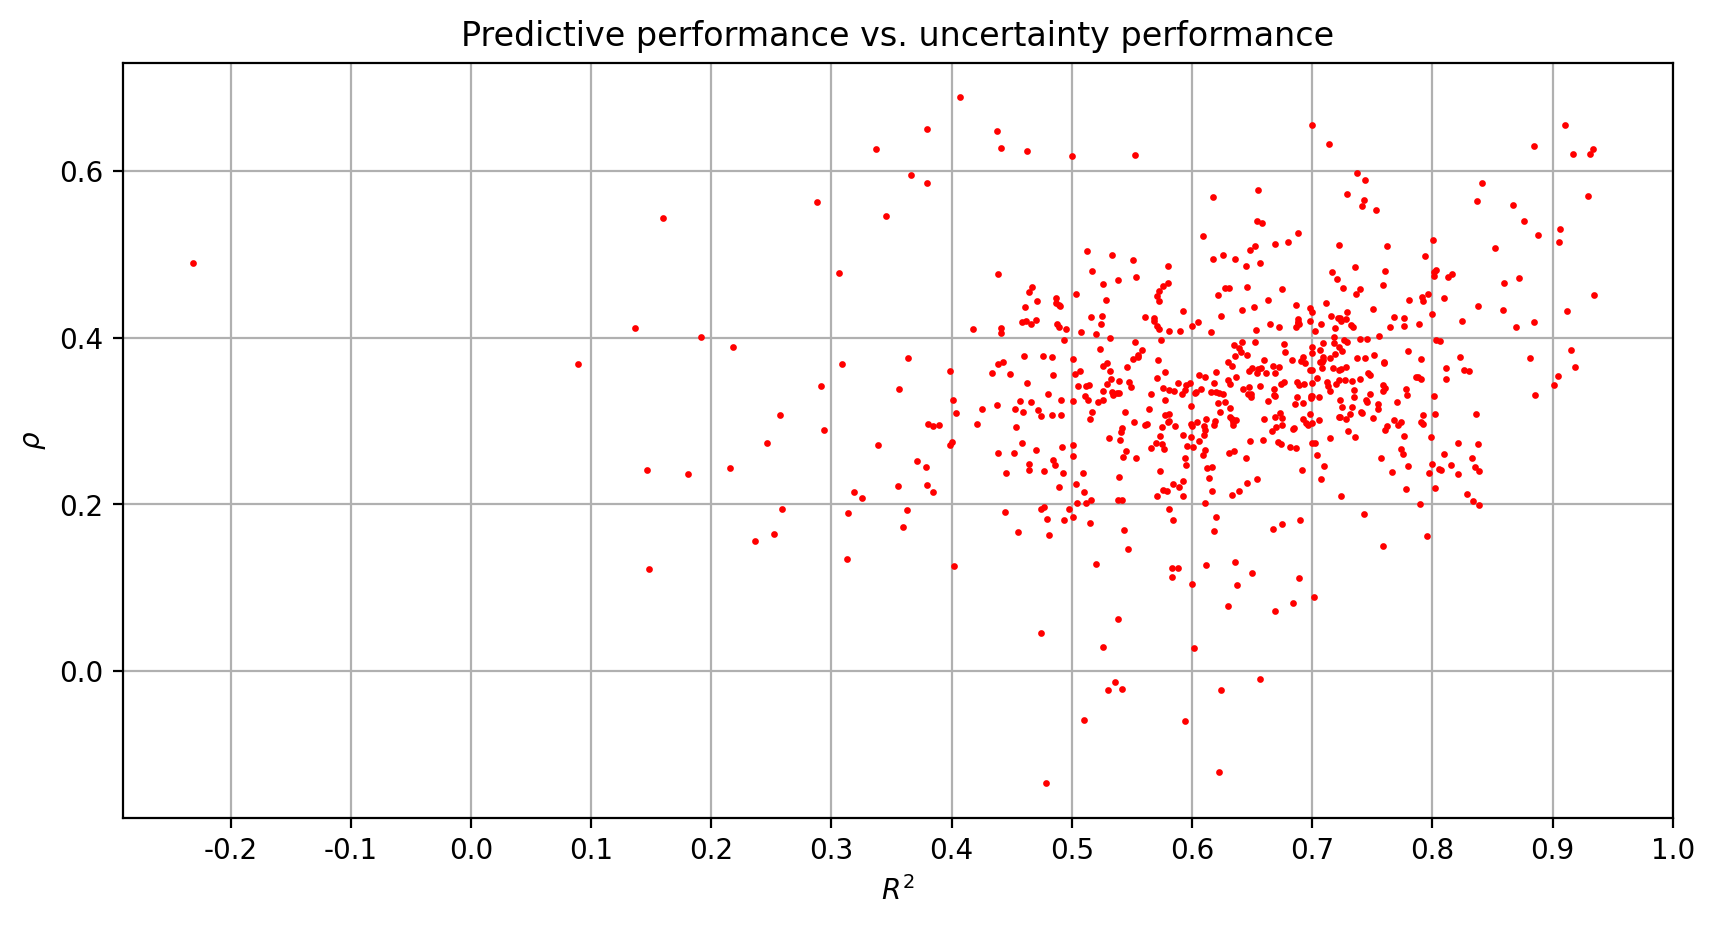

In [6]:
plt.figure(figsize=(10, 5))
plt.grid(zorder=1000)
plt.scatter(complete_overview['r2'], complete_overview['rho'], s=2, zorder=100, color='red')
plt.xlabel(r'$R^2$')
plt.xticks(np.arange(-.2, 1.1, .1), [f'{val:.1f}' for val in np.arange(-.2, 1.1, .1)])
plt.ylabel(r'$\rho$')
plt.title('Predictive performance vs. uncertainty performance')
plt.savefig(PLOT_FOLDER+'unselected_overview.pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()

#### Plot by dataset

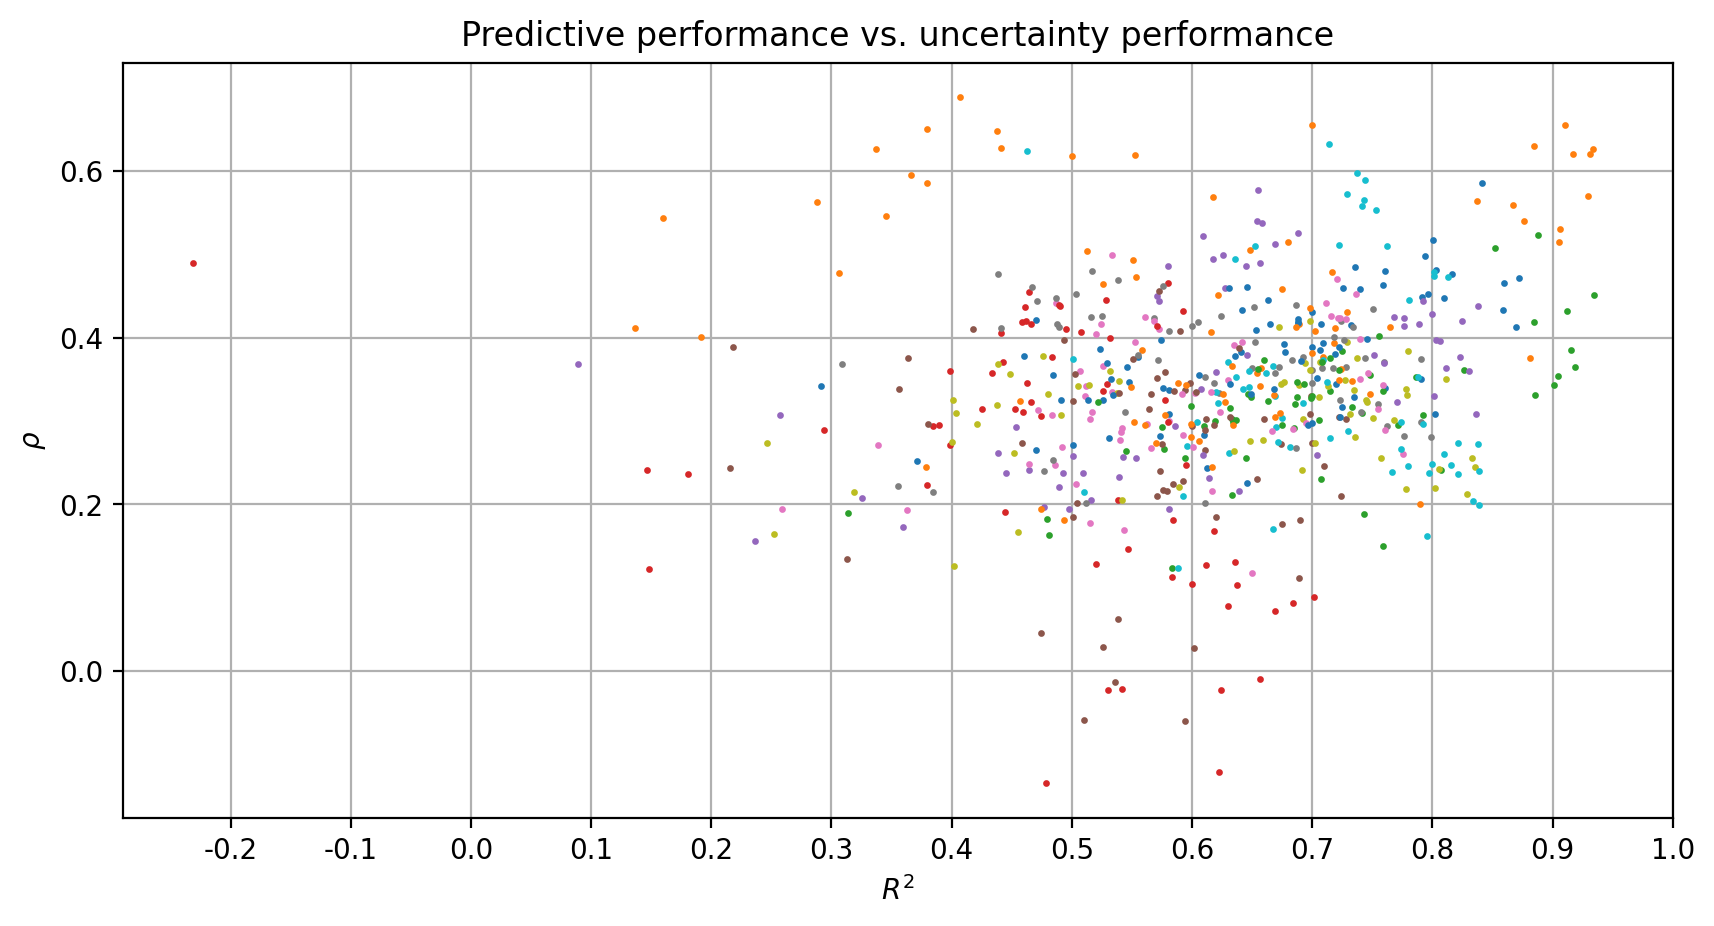

In [7]:
plt.figure(figsize=(10, 5))
plt.grid(zorder=1000)
for name in dataset_names:
    subset = complete_overview[complete_overview['name'] == name]
    plt.scatter(subset['r2'], subset['rho'], s=2, zorder=100, label=name)
plt.xlabel(r'$R^2$')
plt.xticks(np.arange(-.2, 1.1, .1), [f'{val:.1f}' for val in np.arange(-.2, 1.1, .1)])
plt.ylabel(r'$\rho$')
plt.title('Predictive performance vs. uncertainty performance')
plt.show()

#### Plot by featurization and technique

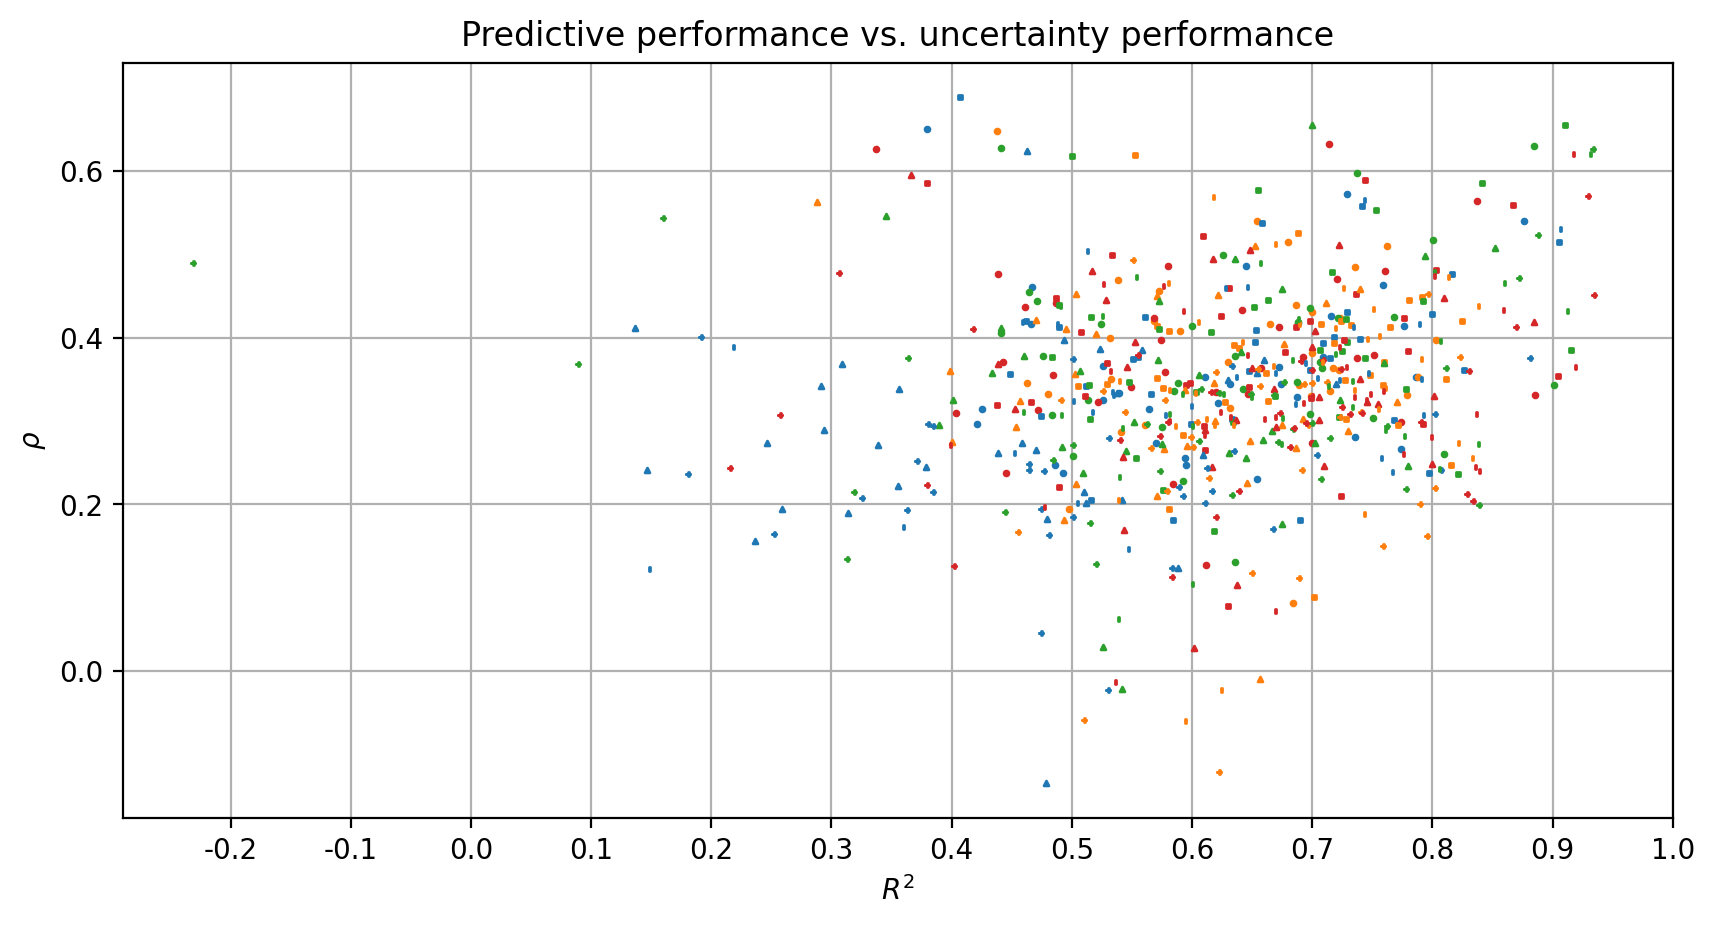

In [8]:
plt.figure(figsize=(10, 5))
markers = ['o', 's', '^', '$+$', '$|$']
plt.grid(zorder=1000)
for i, model in enumerate(algorithm_names):
    model_subset = complete_overview[complete_overview['model'] == model]
    for j, descriptor in enumerate(descriptor_names):
        model_descriptor_subset = model_subset[model_subset['descriptor'] == descriptor]
        plt.scatter(model_descriptor_subset['r2'], model_descriptor_subset['rho'], s=3, zorder=100, marker=markers[i], color=f'C{j}')
plt.xlabel(r'$R^2$')
plt.xticks(np.arange(-.2, 1.1, .1), [f'{val:.1f}' for val in np.arange(-.2, 1.1, .1)])
plt.ylabel(r'$\rho$')
plt.title('Predictive performance vs. uncertainty performance')
plt.show()

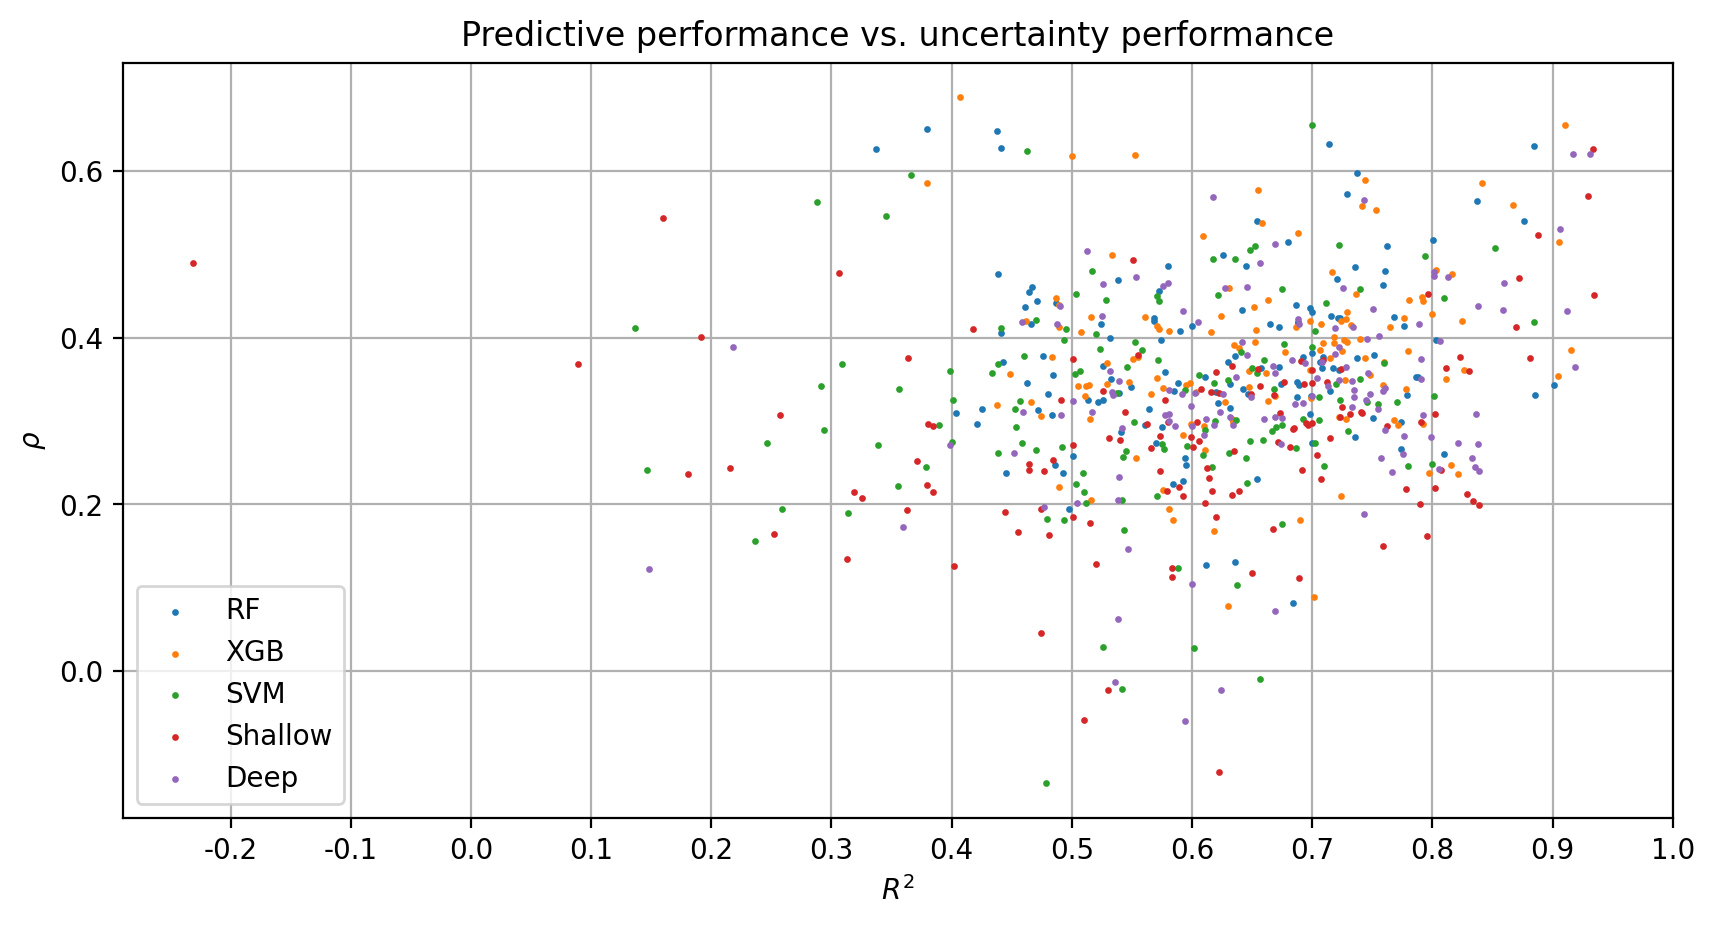

In [9]:
plt.figure(figsize=(10, 5))
plt.grid(zorder=1000)
for i, model in enumerate(algorithm_names):
    subset = complete_overview[complete_overview['model'] == model]
    plt.scatter(subset['r2'], subset['rho'], s=2, zorder=100, color=f'C{i}', label=model)
plt.xlabel(r'$R^2$')
plt.xticks(np.arange(-.2, 1.1, .1), [f'{val:.1f}' for val in np.arange(-.2, 1.1, .1)])
plt.ylabel(r'$\rho$')
plt.title('Predictive performance vs. uncertainty performance')
plt.legend()
plt.show()

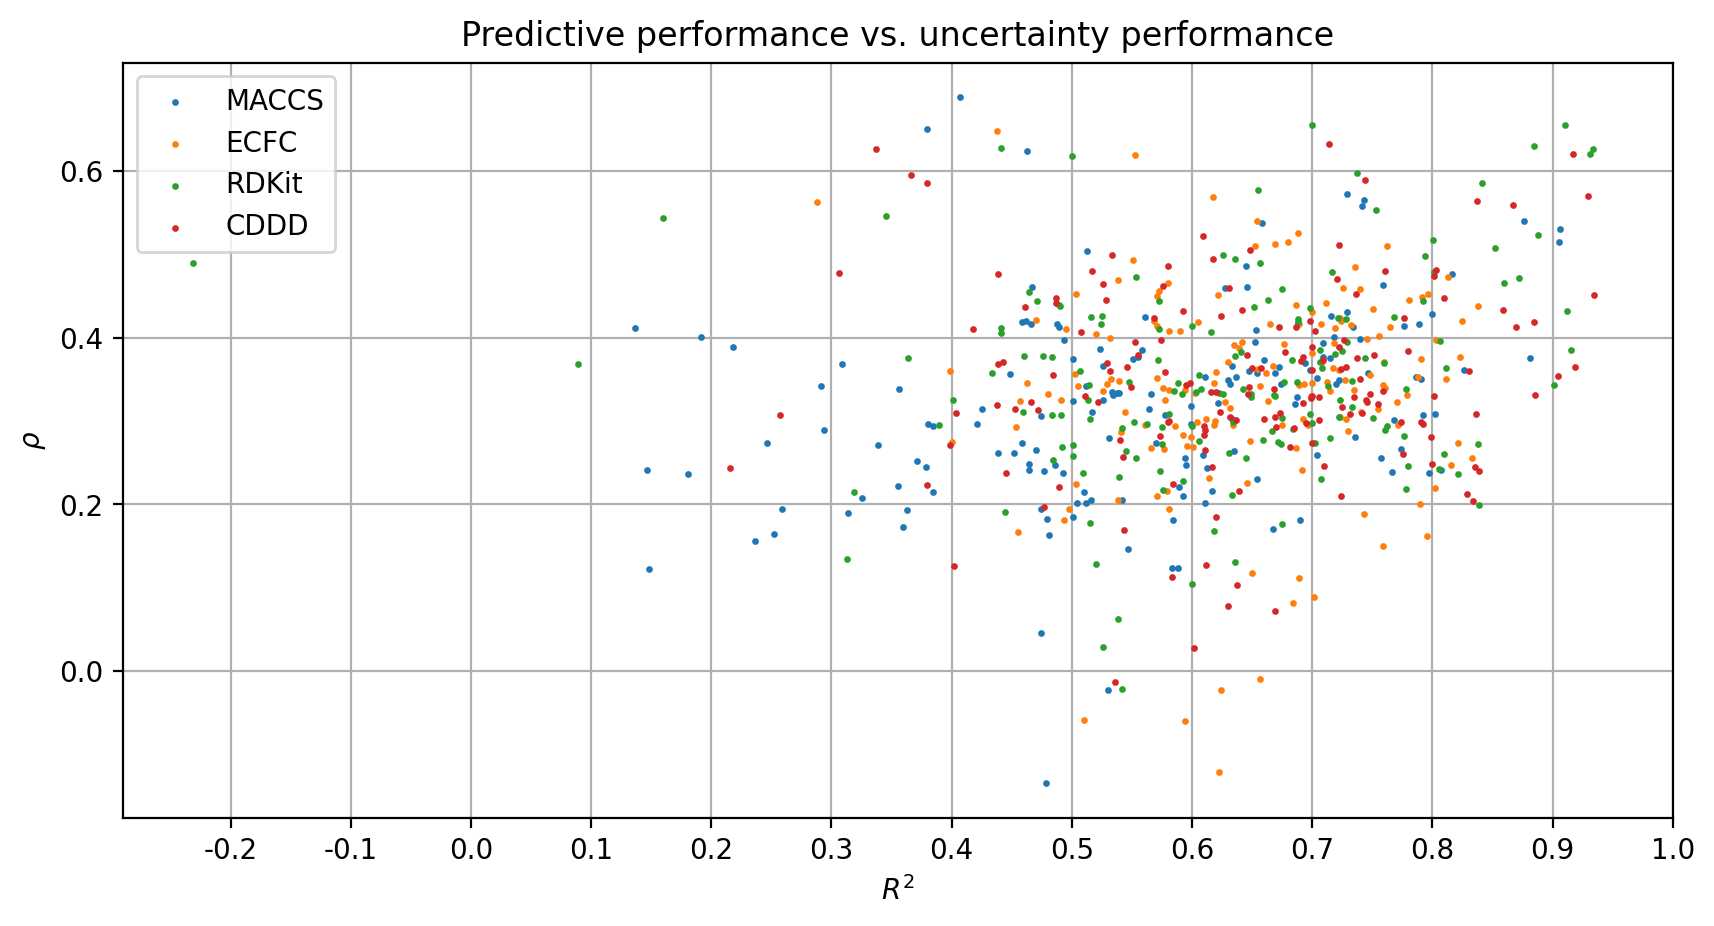

In [10]:
plt.figure(figsize=(10, 5))
plt.grid(zorder=1000)
for i, descriptor in enumerate(descriptor_names):
    subset = complete_overview[complete_overview['descriptor'] == descriptor]
    plt.scatter(subset['r2'], subset['rho'], s=2, zorder=100, color=f'C{i}', label=descriptor)
plt.xlabel(r'$R^2$')
plt.xticks(np.arange(-.2, 1.1, .1), [f'{val:.1f}' for val in np.arange(-.2, 1.1, .1)])
plt.ylabel(r'$\rho$')
plt.title('Predictive performance vs. uncertainty performance')
plt.legend()
plt.show()

#### Point out single attributes

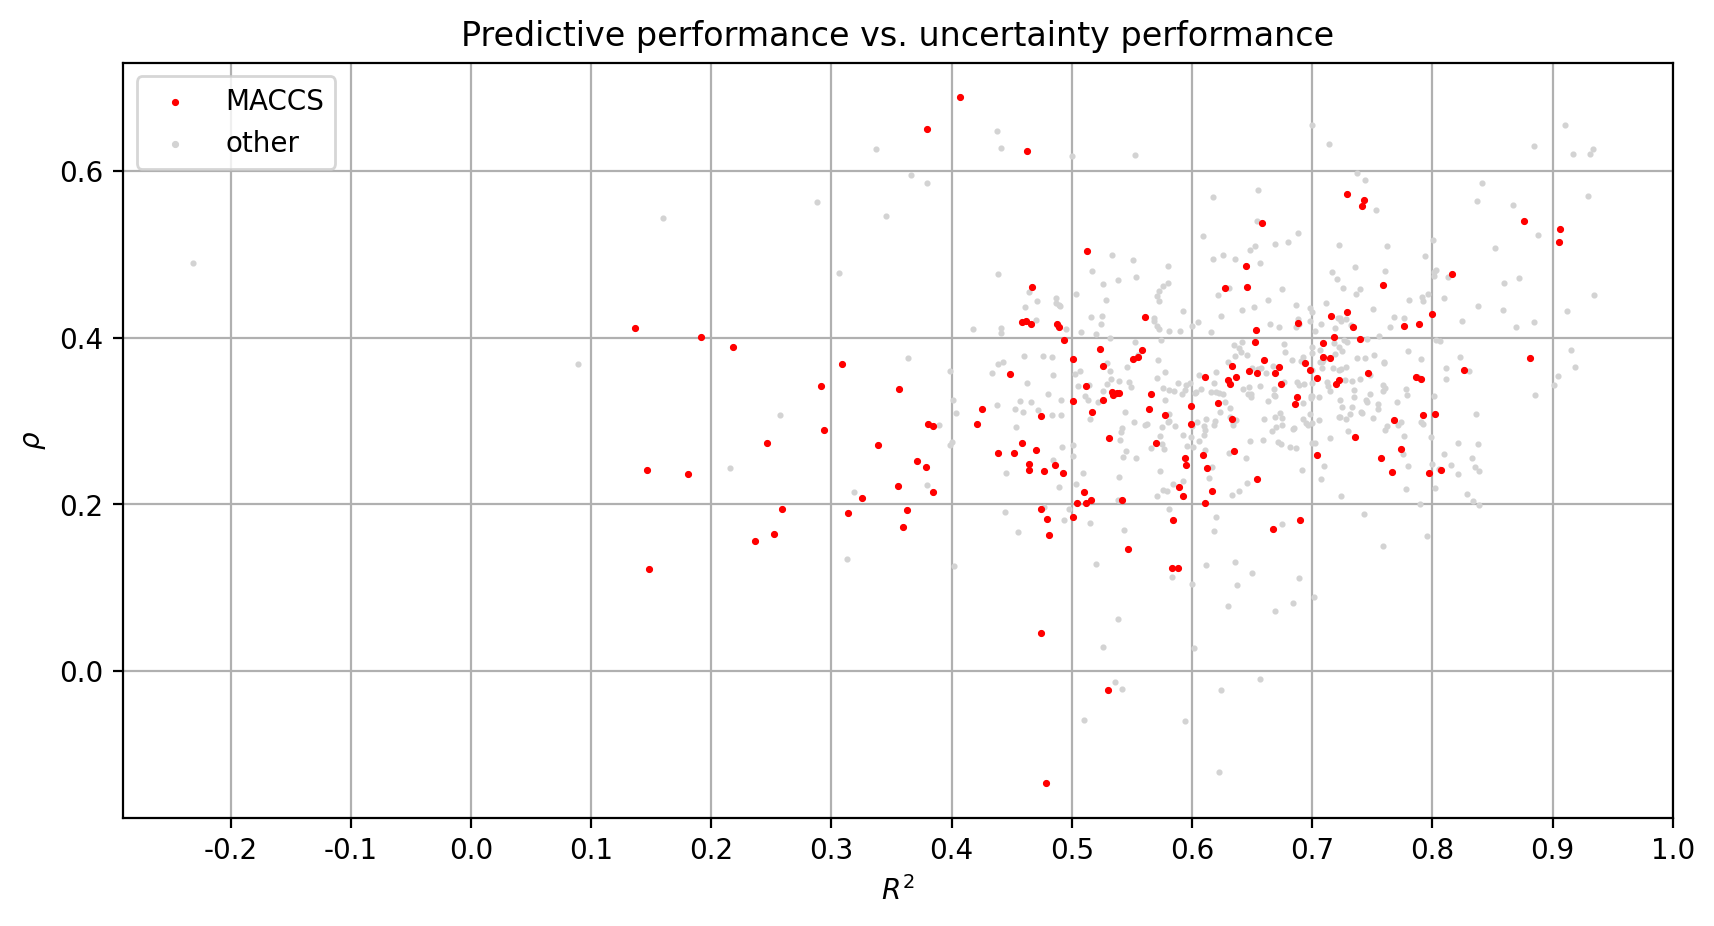

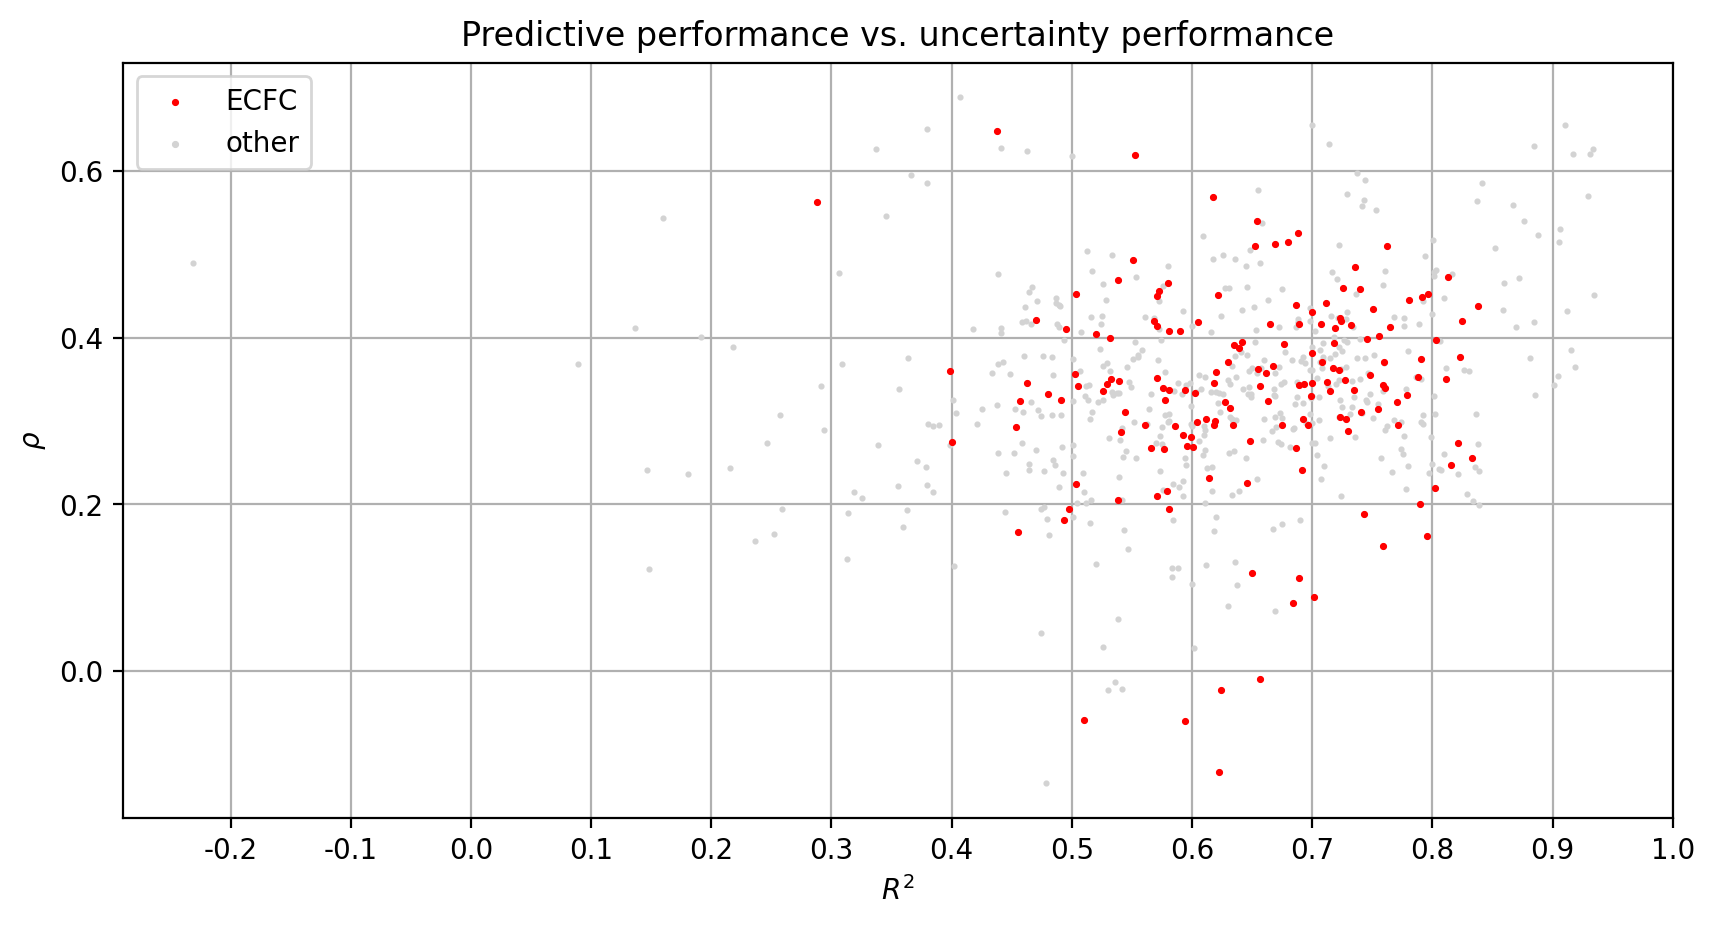

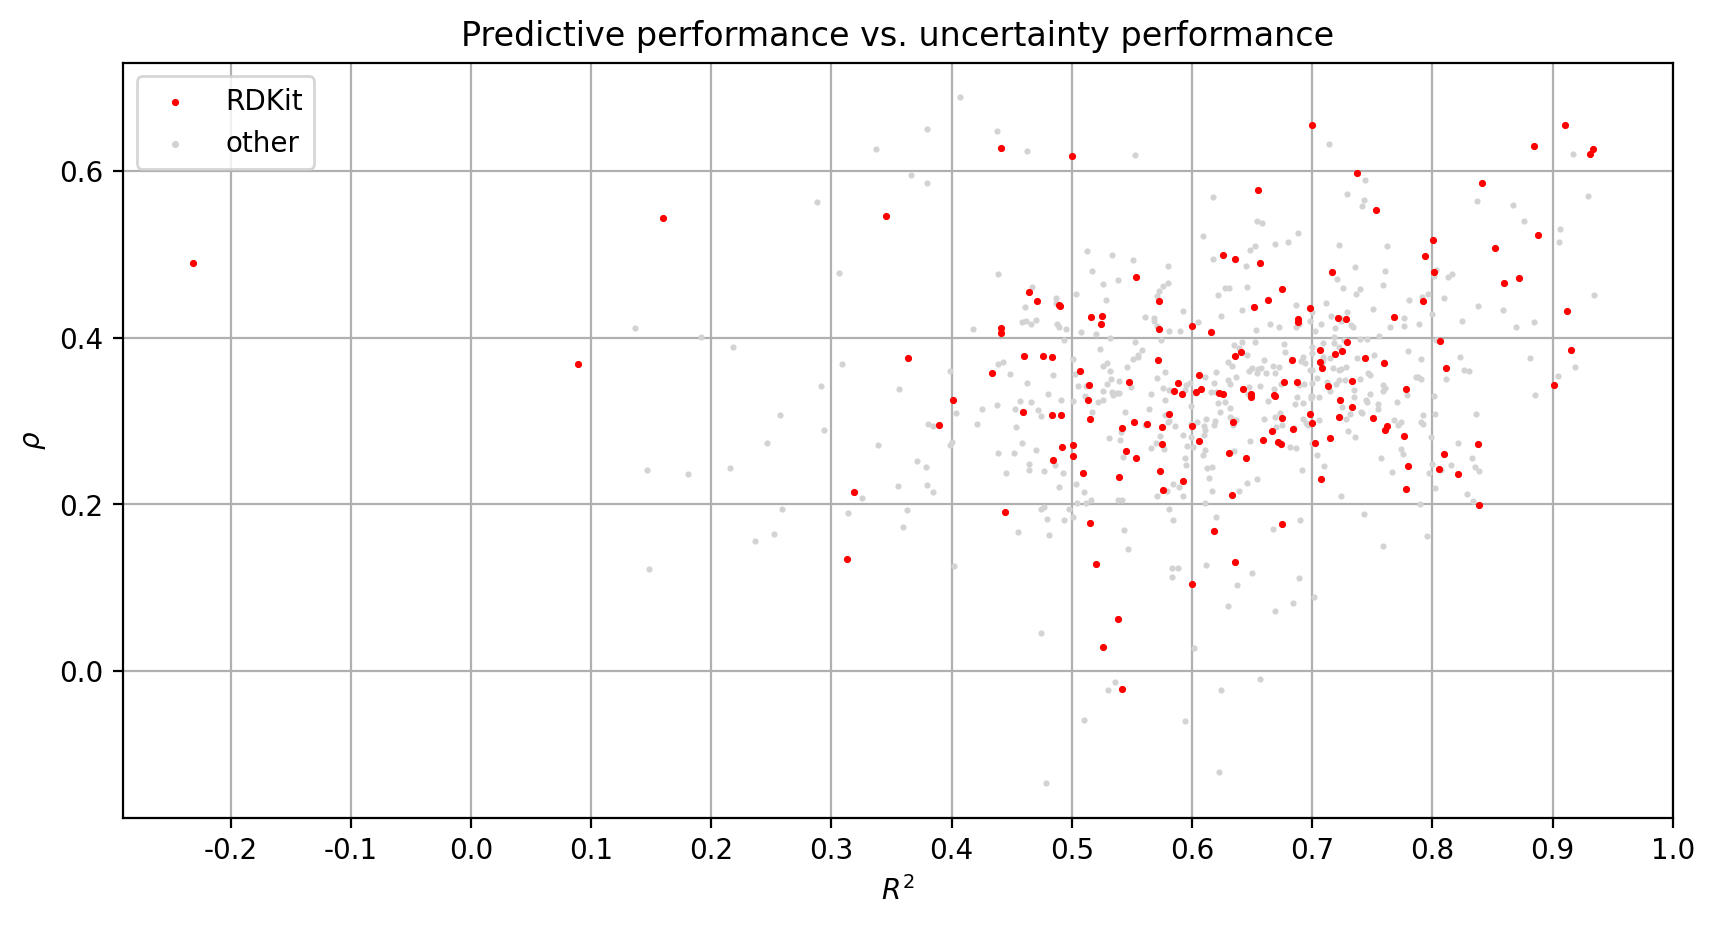

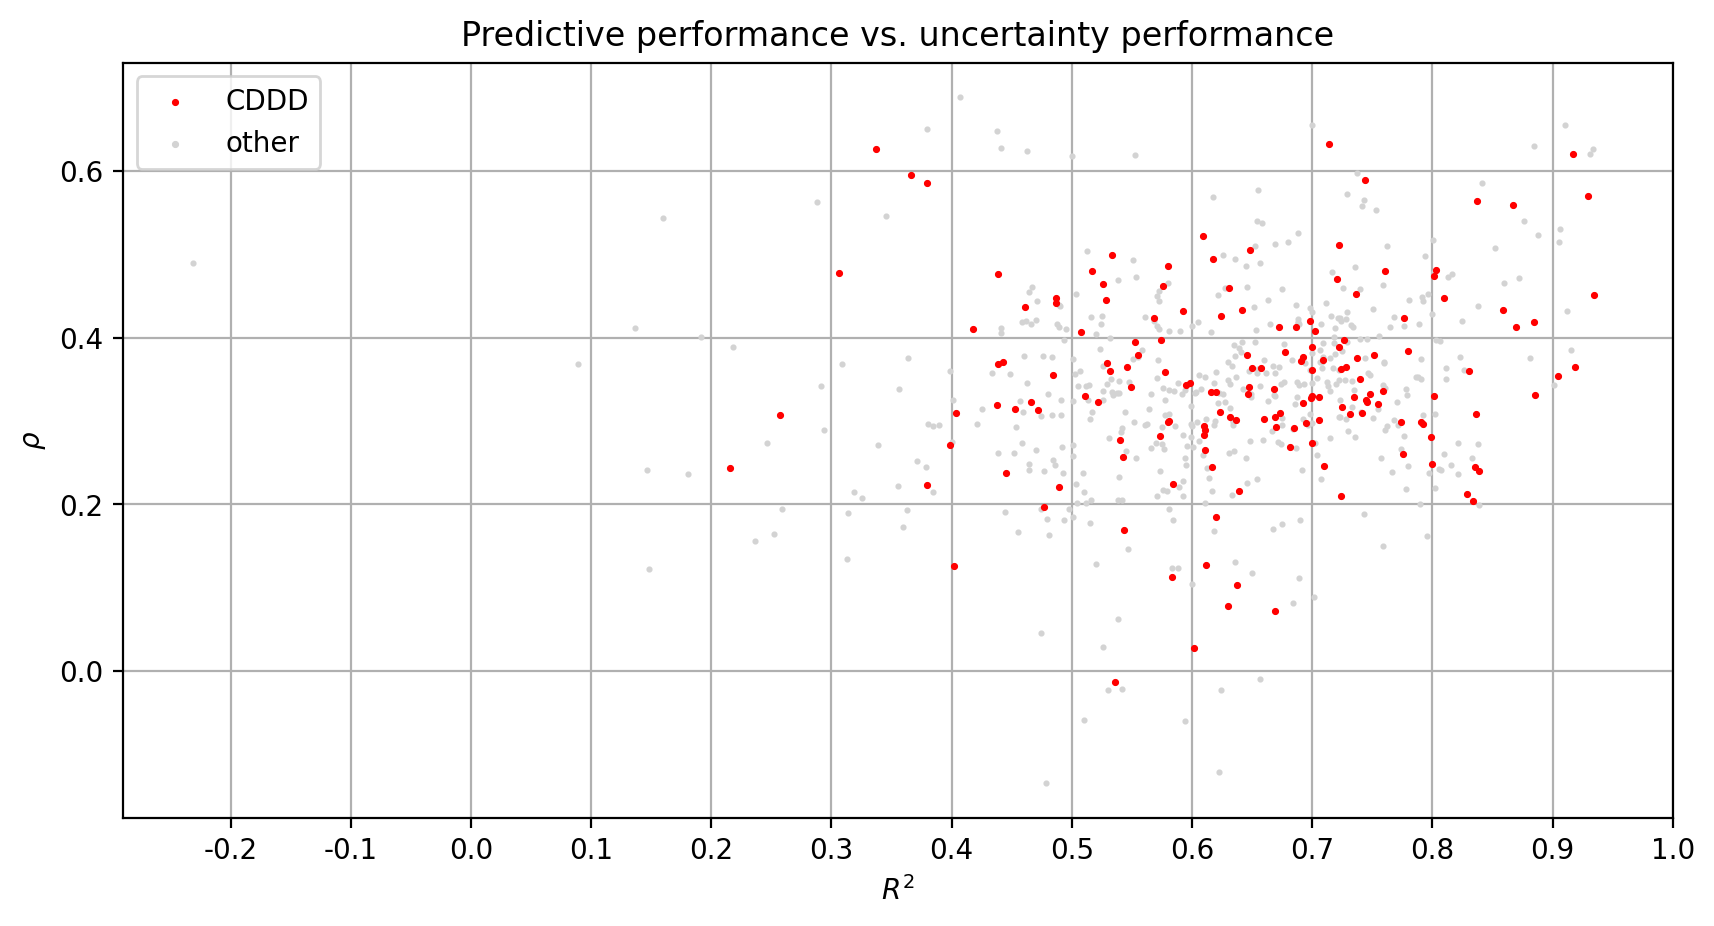

In [11]:
for desc in descriptor_names:
    plt.figure(figsize=(10, 5))
    plt.grid(zorder=1000)
    for i, descriptor in enumerate(descriptor_names):
        subset = complete_overview[complete_overview['descriptor'] == descriptor]
        if descriptor == desc:
            plt.scatter(subset['r2'], subset['rho'], s=2.5, zorder=101, color='red', label=desc)
        else:
            plt.scatter(subset['r2'], subset['rho'], s=1.5, zorder=100, color='lightgrey')
    plt.scatter([], [], s=2.5, zorder=100, color='lightgrey', label='other')
    plt.xlabel(r'$R^2$')
    plt.xticks(np.arange(-.2, 1.1, .1), [f'{val:.1f}' for val in np.arange(-.2, 1.1, .1)])
    plt.ylabel(r'$\rho$')
    plt.title('Predictive performance vs. uncertainty performance')
    plt.legend()
    plt.show()

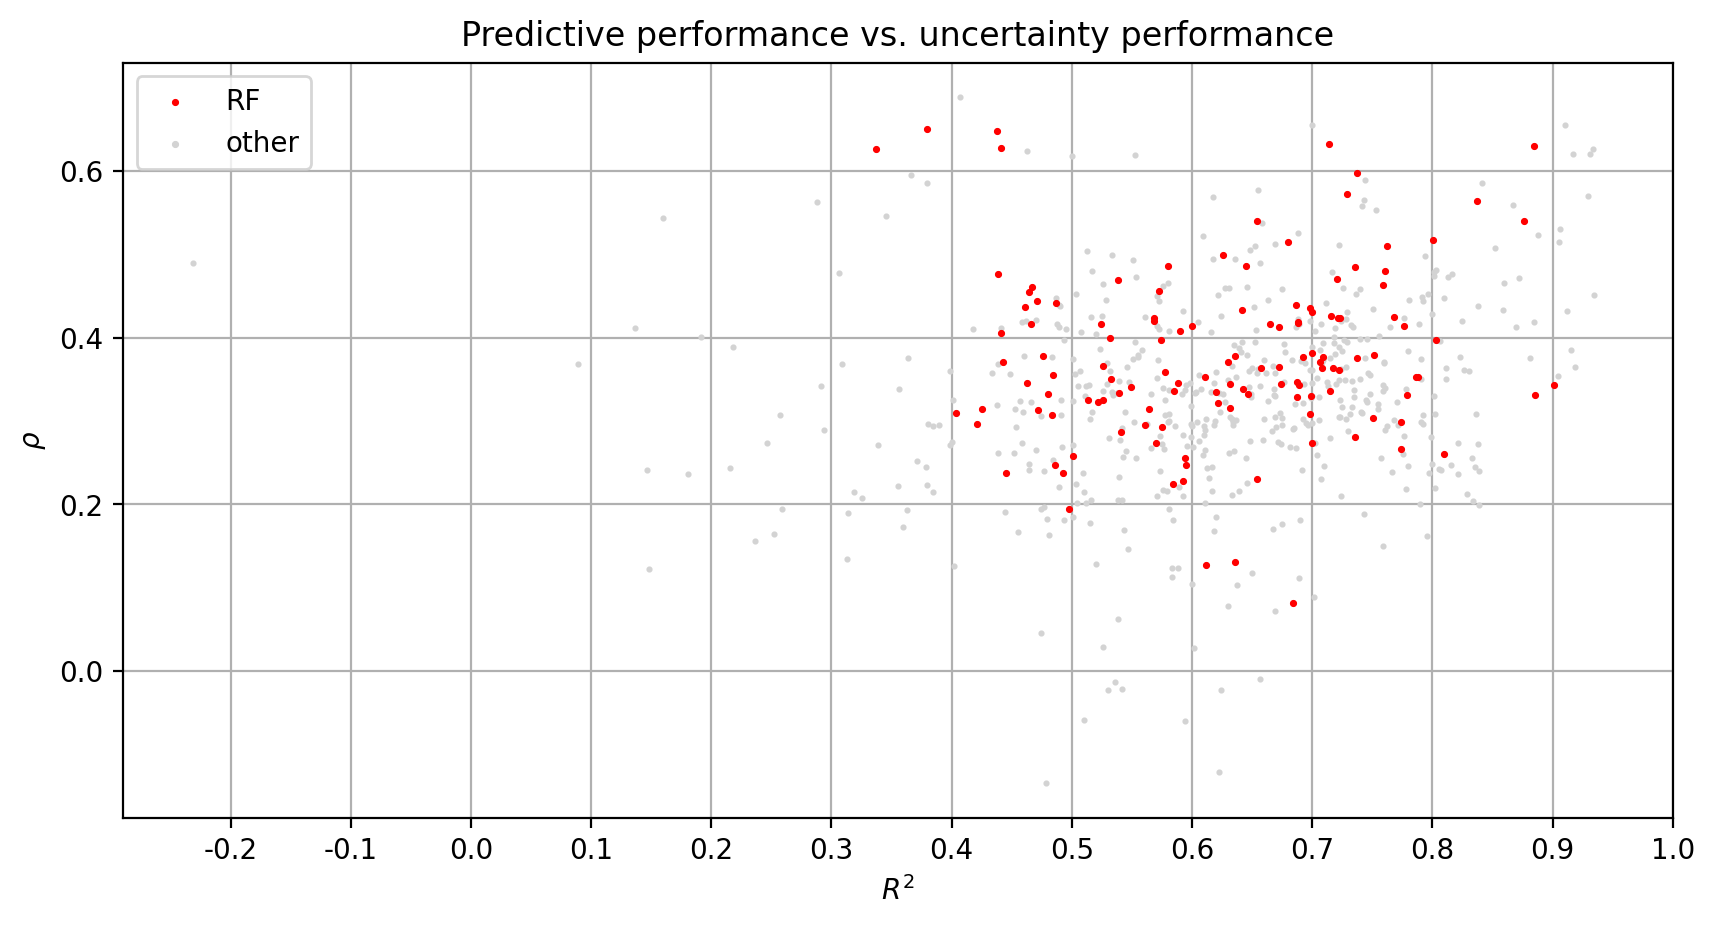

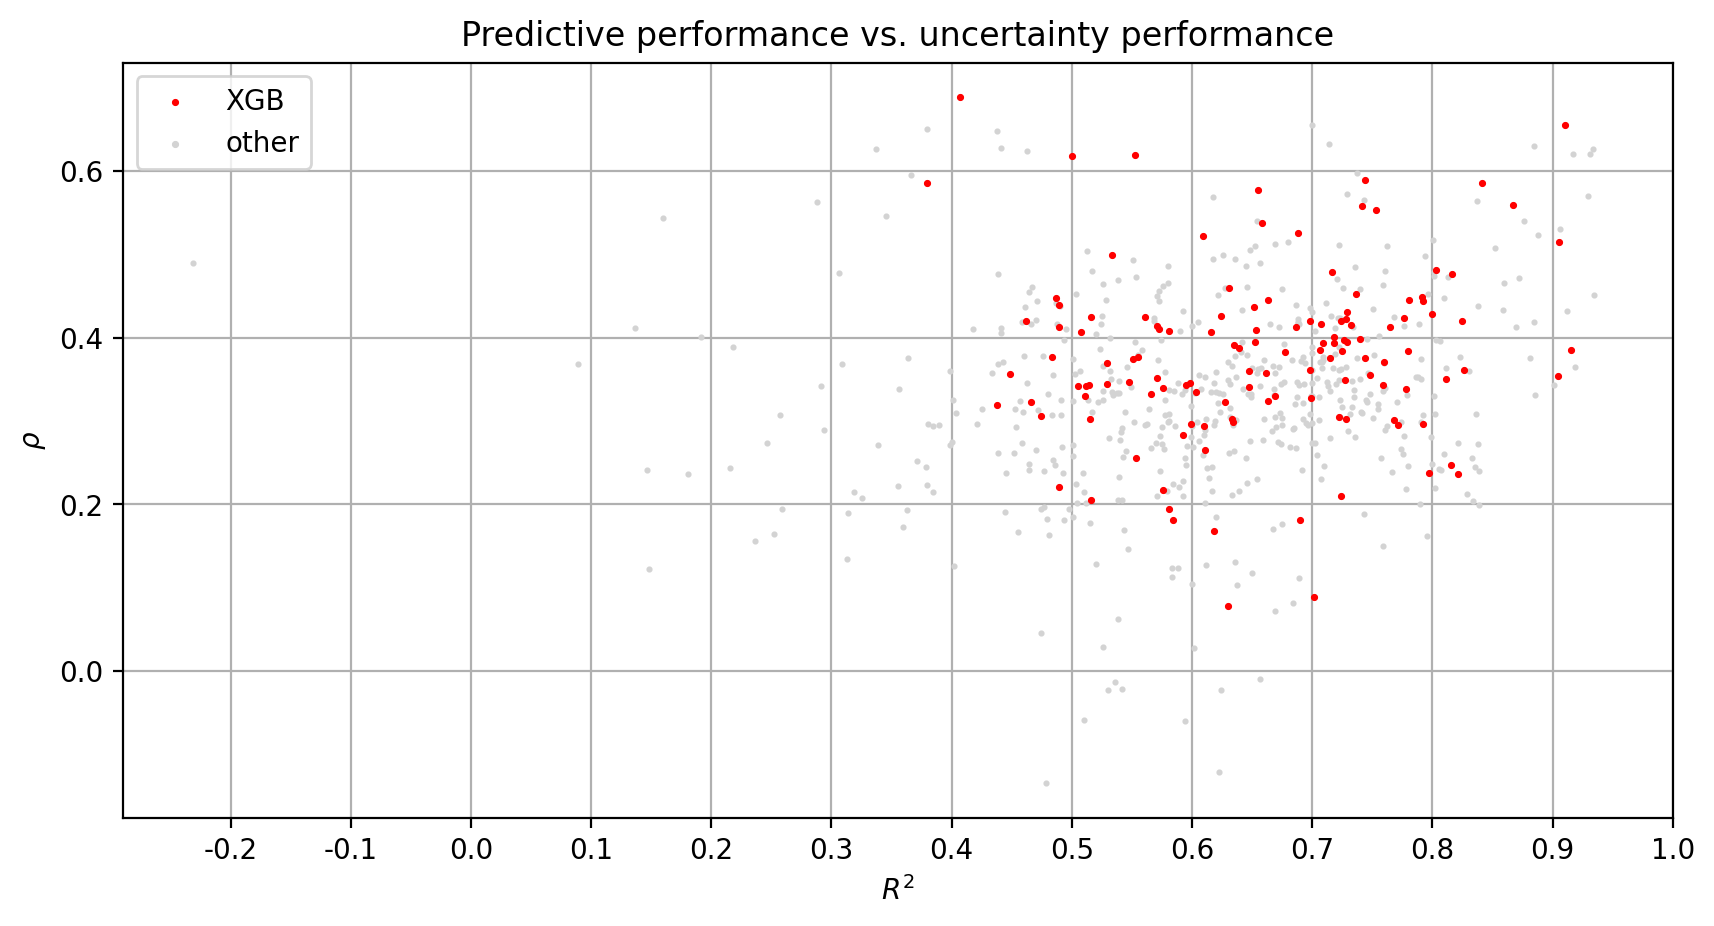

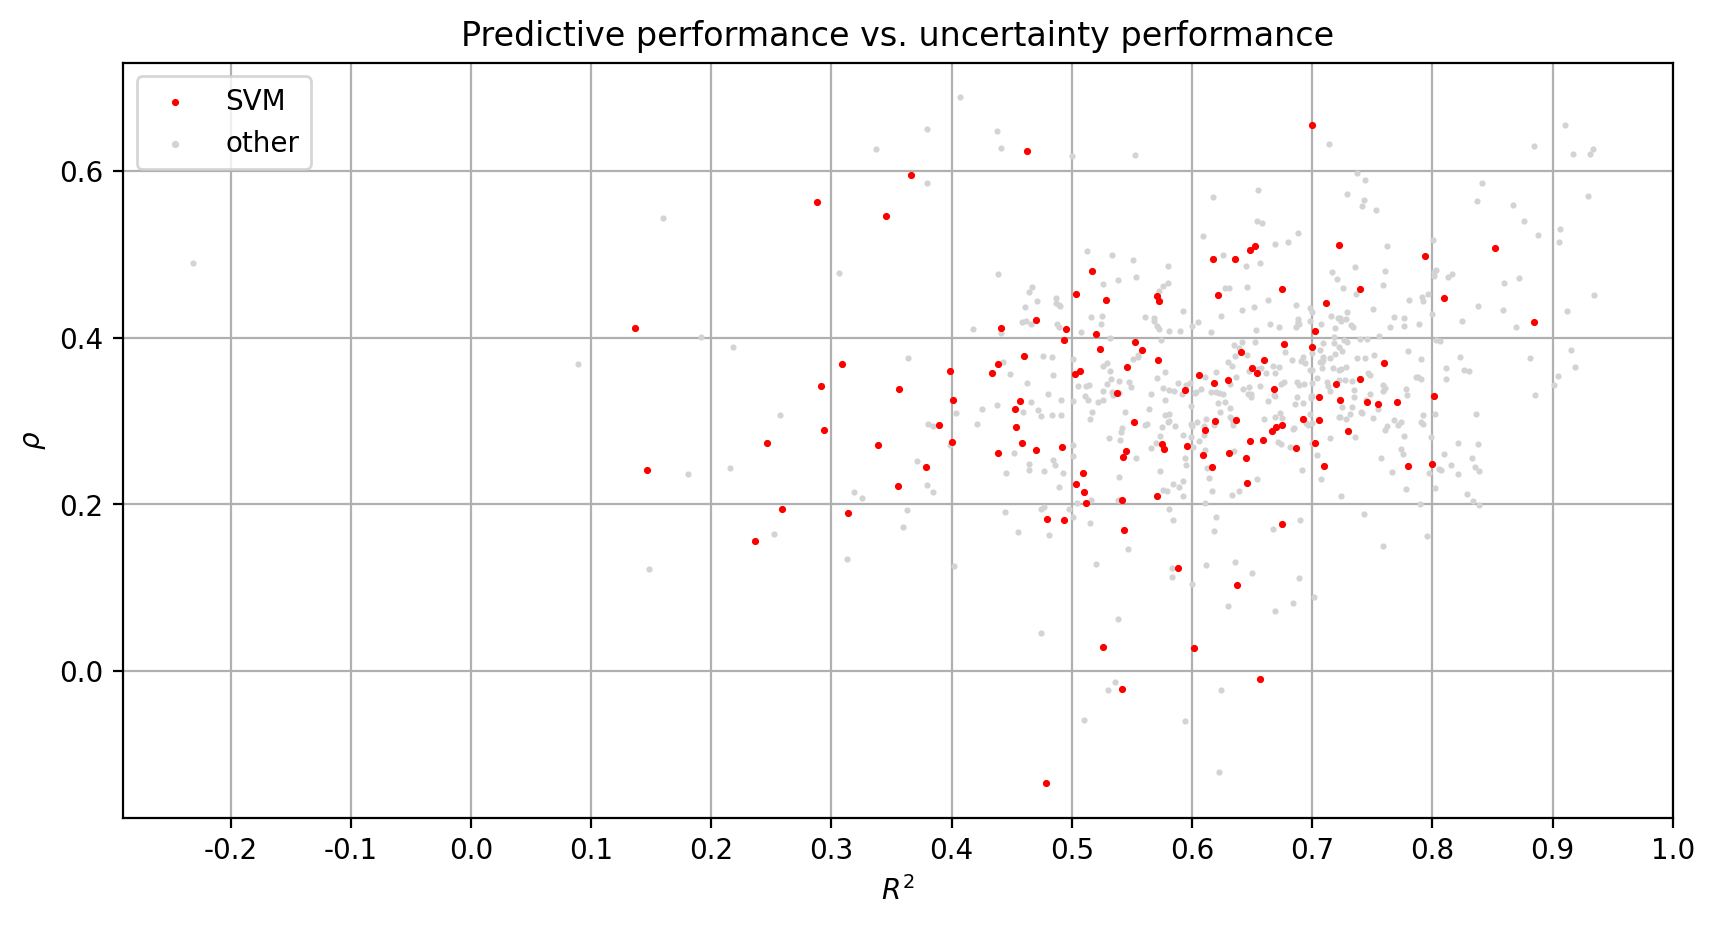

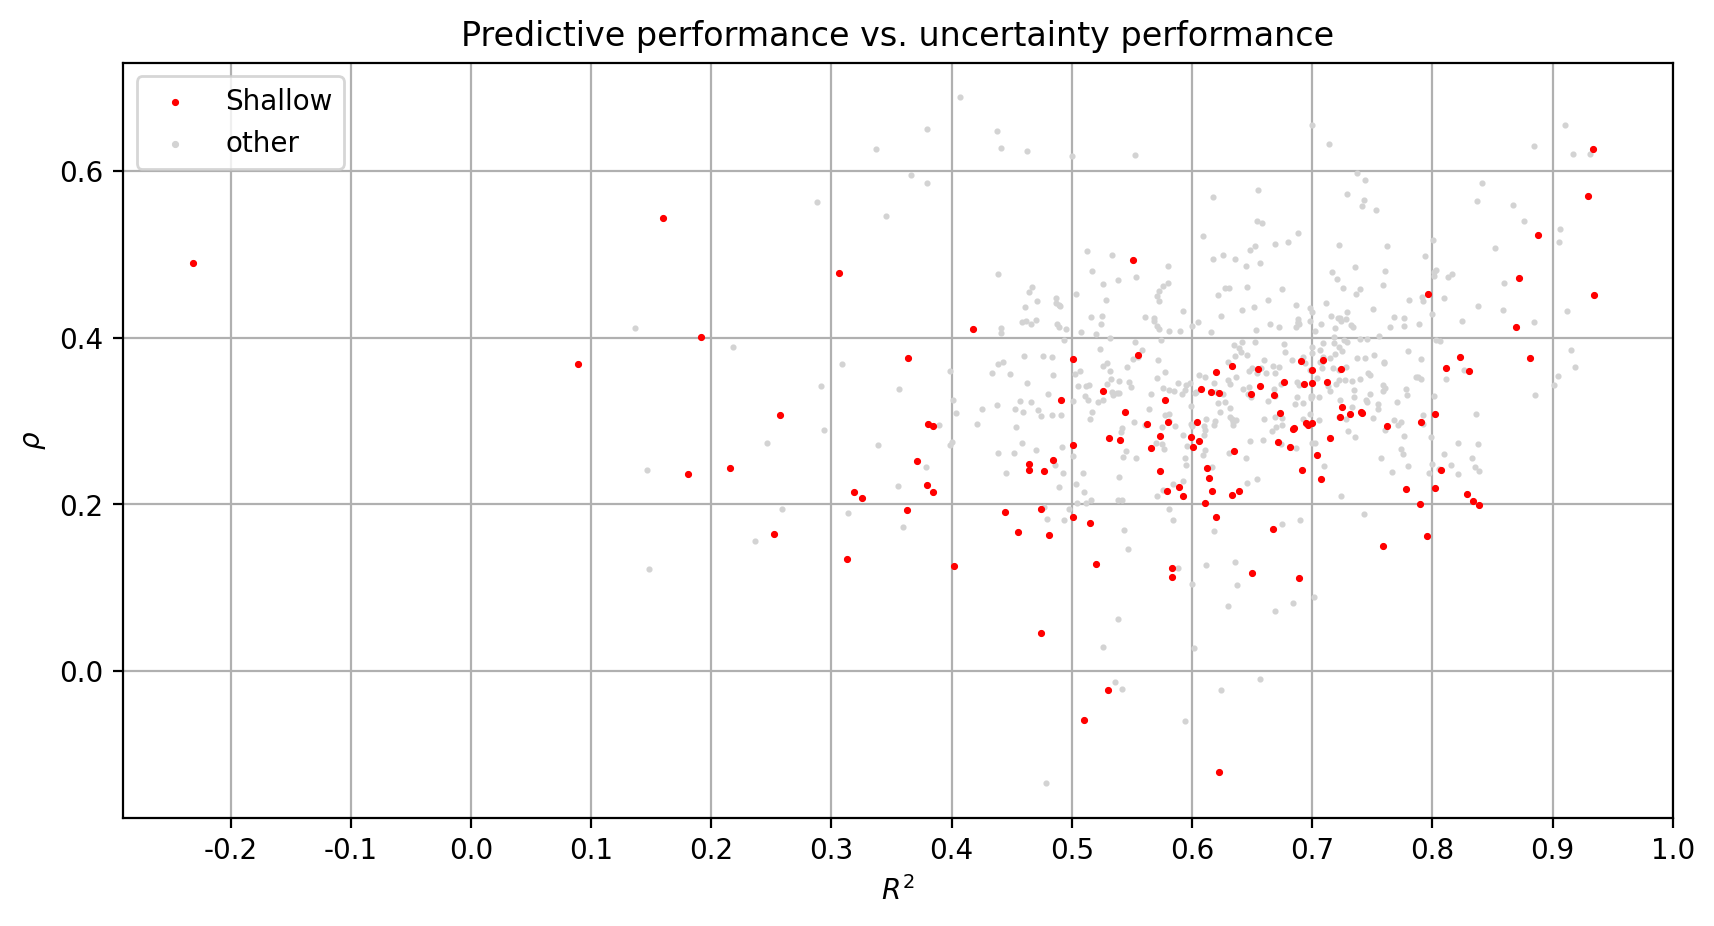

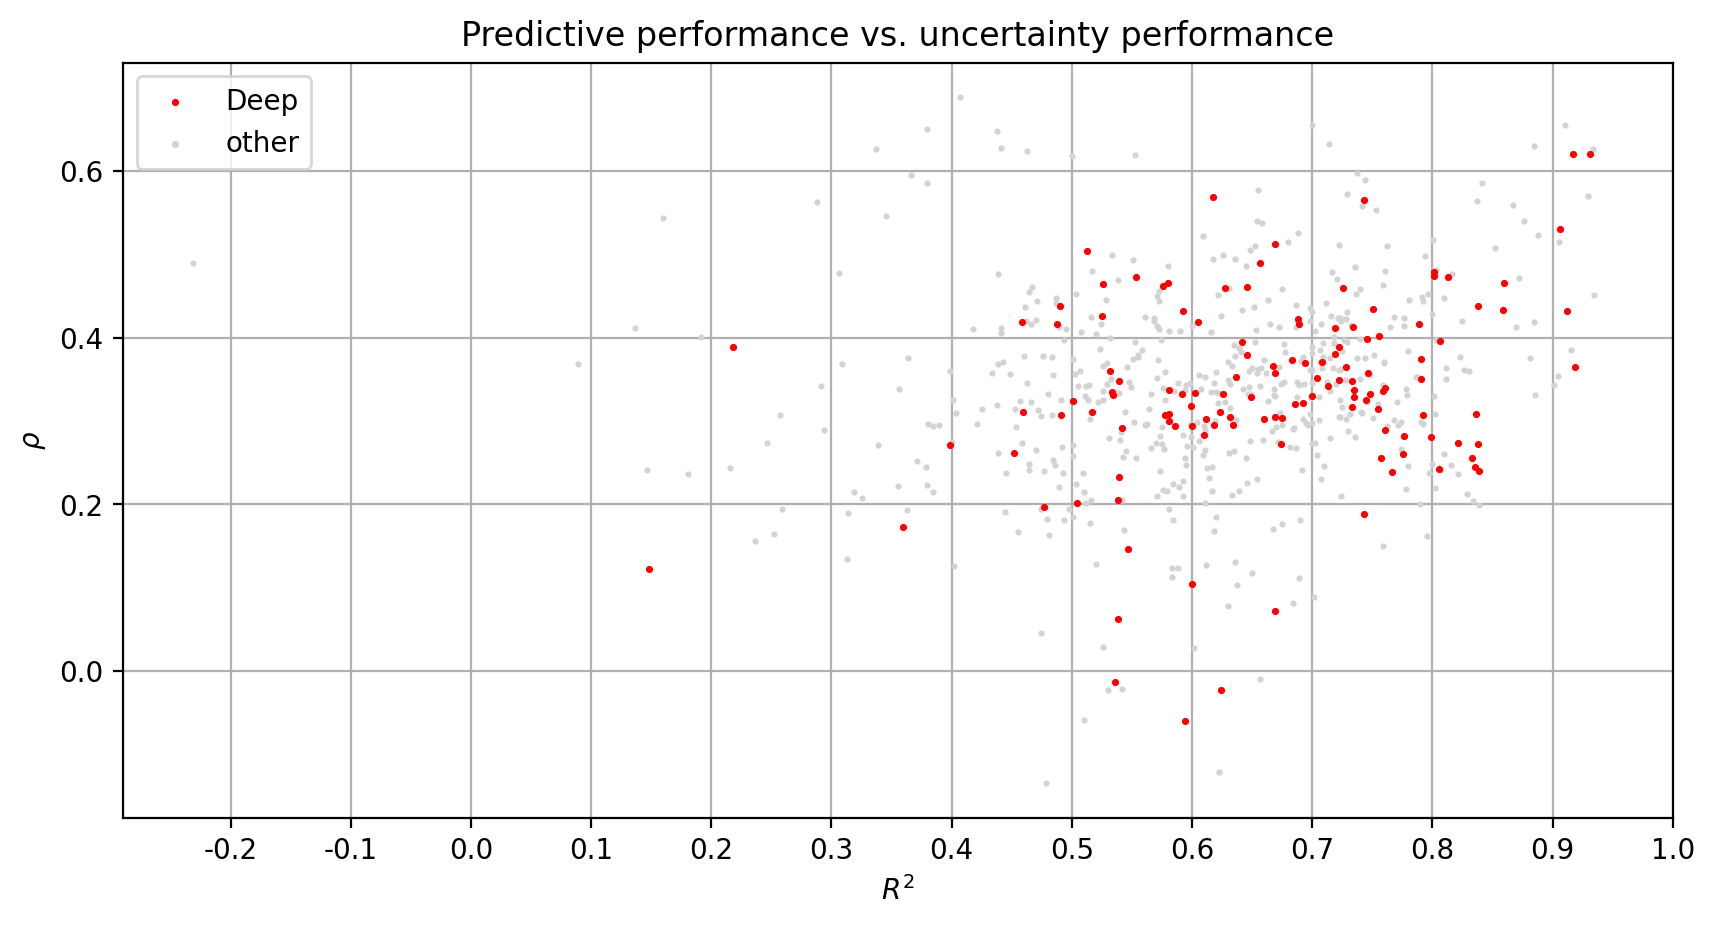

In [12]:
for alg in algorithm_names:
    plt.figure(figsize=(10, 5))
    plt.grid(zorder=1000)
    for i, model in enumerate(algorithm_names):
        subset = complete_overview[complete_overview['model'] == model]
        if model == alg:
            plt.scatter(subset['r2'], subset['rho'], s=2.5, zorder=101, color='red', label=alg)
        else:
            plt.scatter(subset['r2'], subset['rho'], s=1.5, zorder=100, color='lightgrey')
    plt.scatter([], [], s=2.5, zorder=100, color='lightgrey', label='other')
    plt.xlabel(r'$R^2$')
    plt.xticks(np.arange(-.2, 1.1, .1), [f'{val:.1f}' for val in np.arange(-.2, 1.1, .1)])
    plt.ylabel(r'$\rho$')
    plt.title('Predictive performance vs. uncertainty performance')
    plt.legend()
    plt.show()

#### Point out combined attributes

Descriptor/model combinations

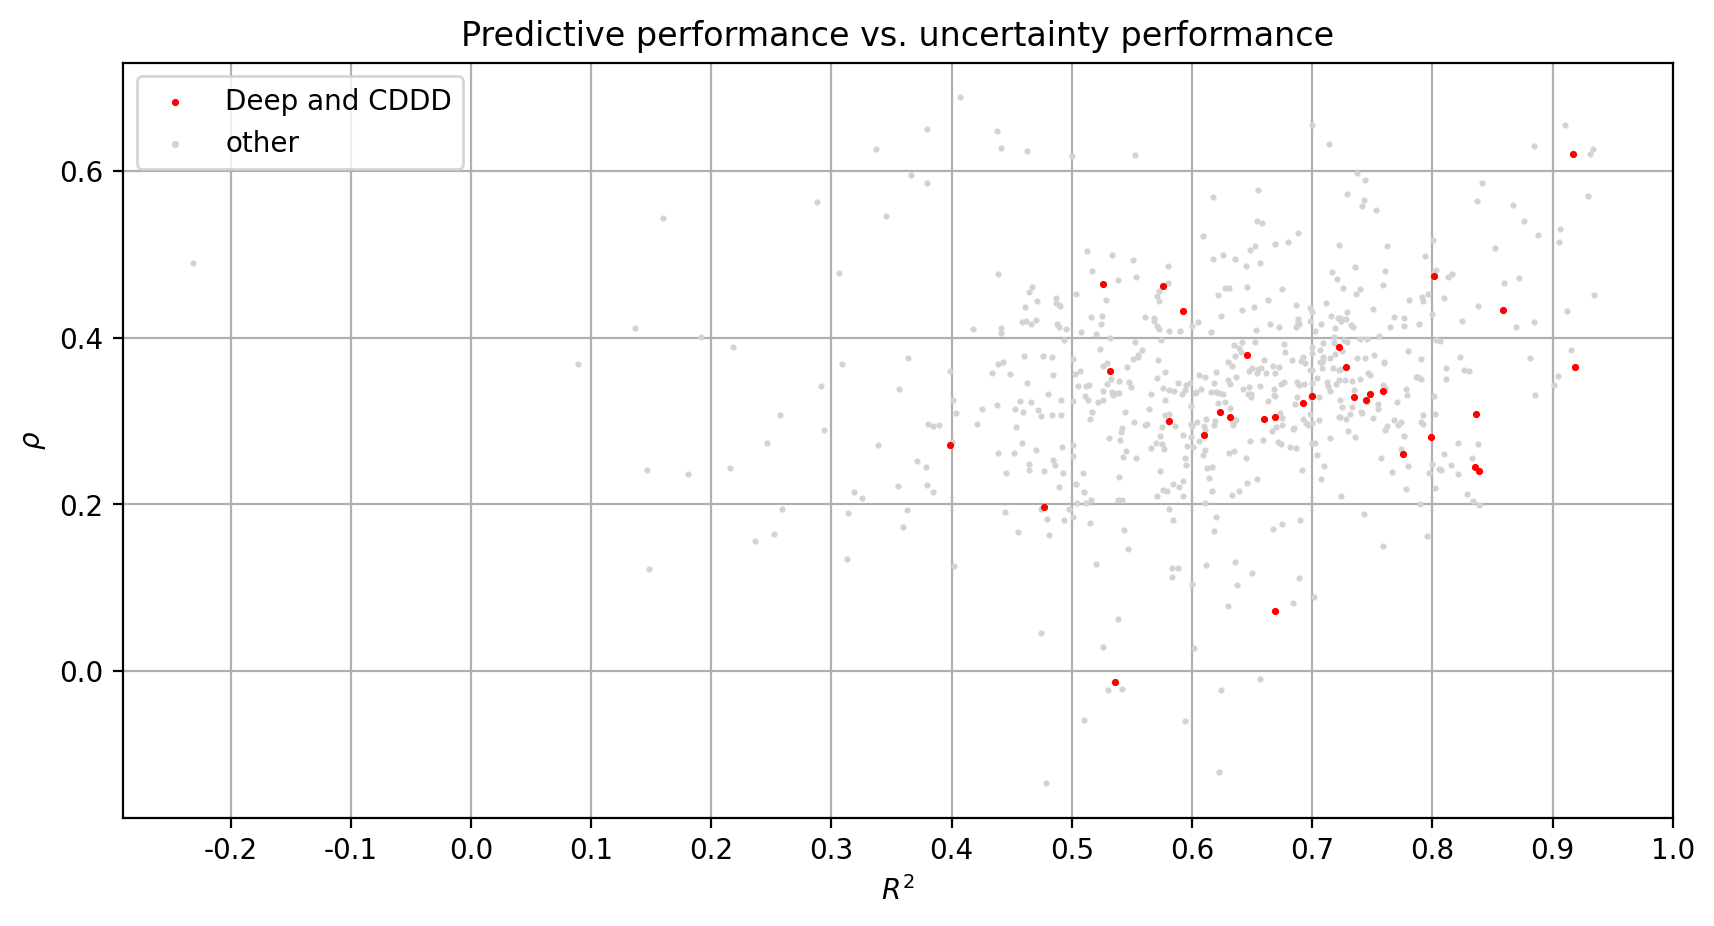

In [13]:
selected_descriptor = 'CDDD'
selected_model = 'Deep'
label = f'{selected_model} and {selected_descriptor}'

plt.figure(figsize=(10, 5))
plt.grid(zorder=1000)
for i, model in enumerate(algorithm_names):
    model_subset = complete_overview[complete_overview['model'] == model]
    for j, descriptor in enumerate(descriptor_names):
        model_descriptor_subset = model_subset[model_subset['descriptor'] == descriptor]
        if descriptor == selected_descriptor and model == selected_model:
            plt.scatter(model_descriptor_subset['r2'], model_descriptor_subset['rho'], s=2.5, zorder=101, color='red', label=label)
        else:
            plt.scatter(model_descriptor_subset['r2'], model_descriptor_subset['rho'], s=1.5, zorder=100, color='lightgrey')
plt.scatter([], [], s=2.5, zorder=100, color='lightgrey', label='other')
plt.xlabel(r'$R^2$')
plt.xticks(np.arange(-.2, 1.1, .1), [f'{val:.1f}' for val in np.arange(-.2, 1.1, .1)])
plt.ylabel(r'$\rho$')
plt.title('Predictive performance vs. uncertainty performance')
plt.legend()
plt.show()

Specific datasets

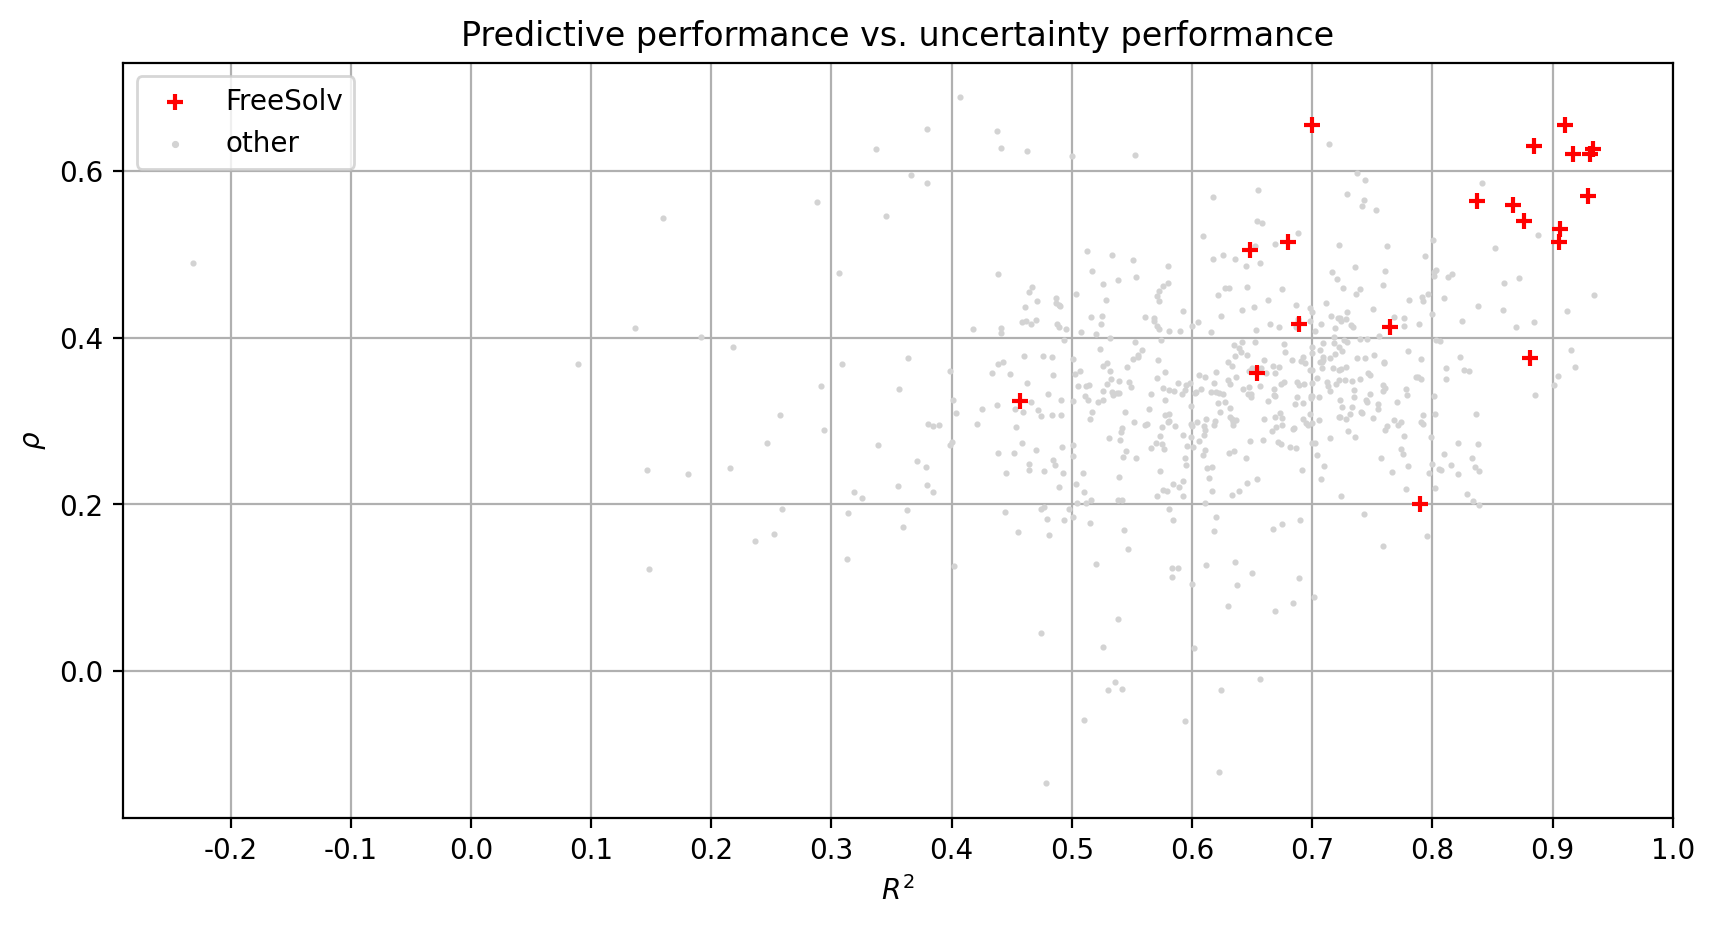

In [14]:
selected_dataset = 'freesolv'
selected_dataset_name = 'FreeSolv'

plt.figure(figsize=(10, 5))
plt.grid(zorder=1000)
for i, name in enumerate(dataset_names):
    name_subset = complete_overview[complete_overview['name'] == name]
    if name == selected_dataset:
        plt.scatter(name_subset['r2'], name_subset['rho'], s=30, zorder=101, color='red', marker='+', label=selected_dataset_name)
    else:
        plt.scatter(name_subset['r2'], name_subset['rho'], s=1.5, zorder=100, color='lightgrey')
plt.scatter([], [], s=2.5, zorder=100, color='lightgrey', label='other')
plt.xlabel(r'$R^2$')
plt.xticks(np.arange(-.2, 1.1, .1), [f'{val:.1f}' for val in np.arange(-.2, 1.1, .1)])
plt.ylabel(r'$\rho$')
plt.title('Predictive performance vs. uncertainty performance')
plt.legend()
plt.savefig(PLOT_FOLDER+'overview_freesolv.pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()

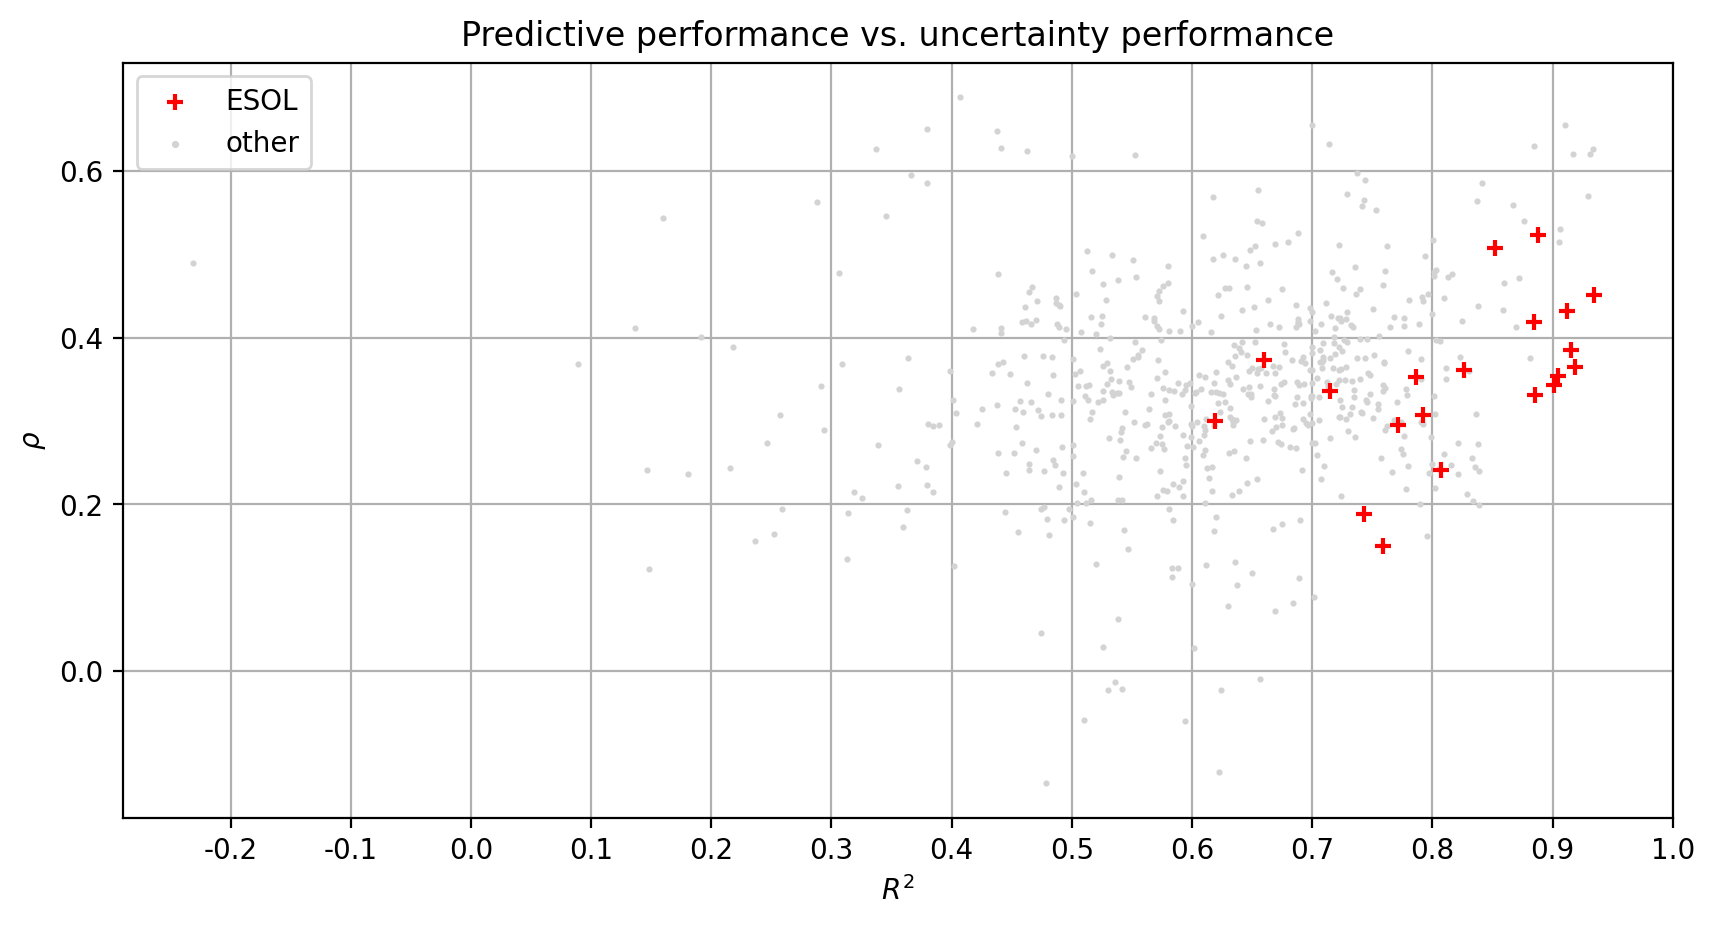

In [15]:
selected_dataset = 'esol'
selected_dataset_name = 'ESOL'

plt.figure(figsize=(10, 5))
plt.grid(zorder=1000)
for i, name in enumerate(dataset_names):
    name_subset = complete_overview[complete_overview['name'] == name]
    if name == selected_dataset:
        plt.scatter(name_subset['r2'], name_subset['rho'], s=30, zorder=101, color='red', marker='+', label=selected_dataset_name)
    else:
        plt.scatter(name_subset['r2'], name_subset['rho'], s=1.5, zorder=100, color='lightgrey')
plt.scatter([], [], s=2.5, zorder=100, color='lightgrey', label='other')
plt.xlabel(r'$R^2$')
plt.xticks(np.arange(-.2, 1.1, .1), [f'{val:.1f}' for val in np.arange(-.2, 1.1, .1)])
plt.ylabel(r'$\rho$')
plt.title('Predictive performance vs. uncertainty performance')
plt.legend()
plt.savefig(PLOT_FOLDER+'overview_esol.pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()

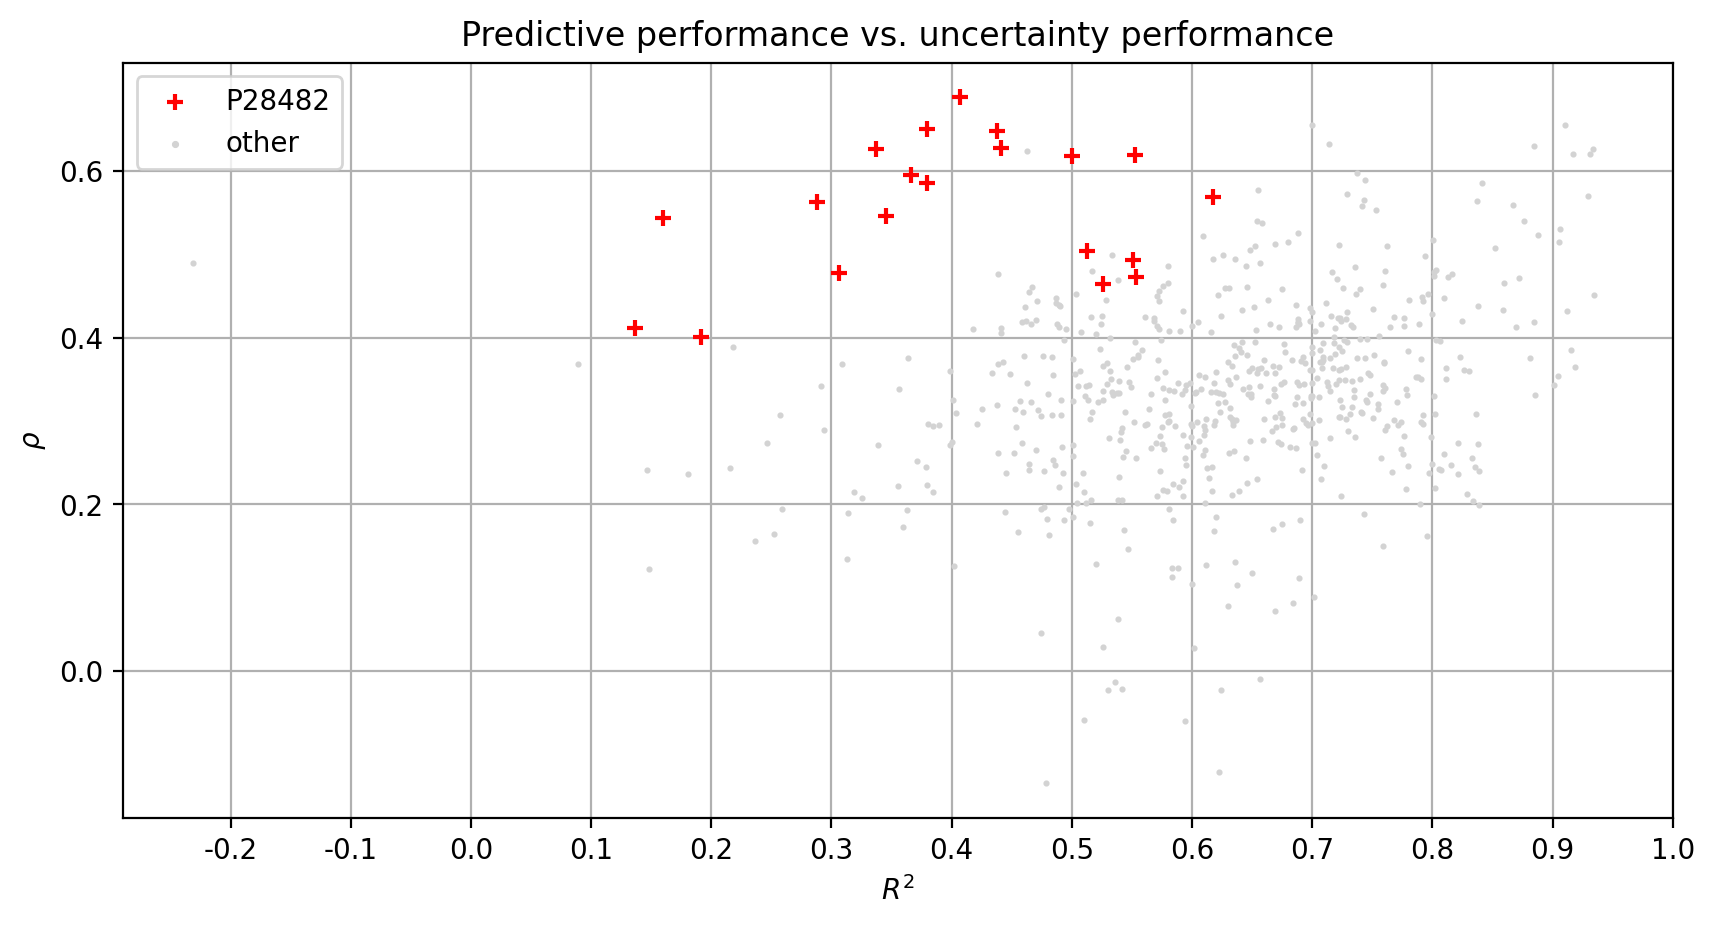

In [16]:
selected_dataset = 'P28482'
selected_dataset_name = 'P28482'

plt.figure(figsize=(10, 5))
plt.grid(zorder=1000)
for i, name in enumerate(dataset_names):
    name_subset = complete_overview[complete_overview['name'] == name]
    if name == selected_dataset:
        plt.scatter(name_subset['r2'], name_subset['rho'], s=30, zorder=101, color='red', marker='+', label=selected_dataset_name)
    else:
        plt.scatter(name_subset['r2'], name_subset['rho'], s=1.5, zorder=100, color='lightgrey')
plt.scatter([], [], s=2.5, zorder=100, color='lightgrey', label='other')
plt.xlabel(r'$R^2$')
plt.xticks(np.arange(-.2, 1.1, .1), [f'{val:.1f}' for val in np.arange(-.2, 1.1, .1)])
plt.ylabel(r'$\rho$')
plt.title('Predictive performance vs. uncertainty performance')
plt.legend()
plt.savefig(PLOT_FOLDER+'overview_P28482.pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()

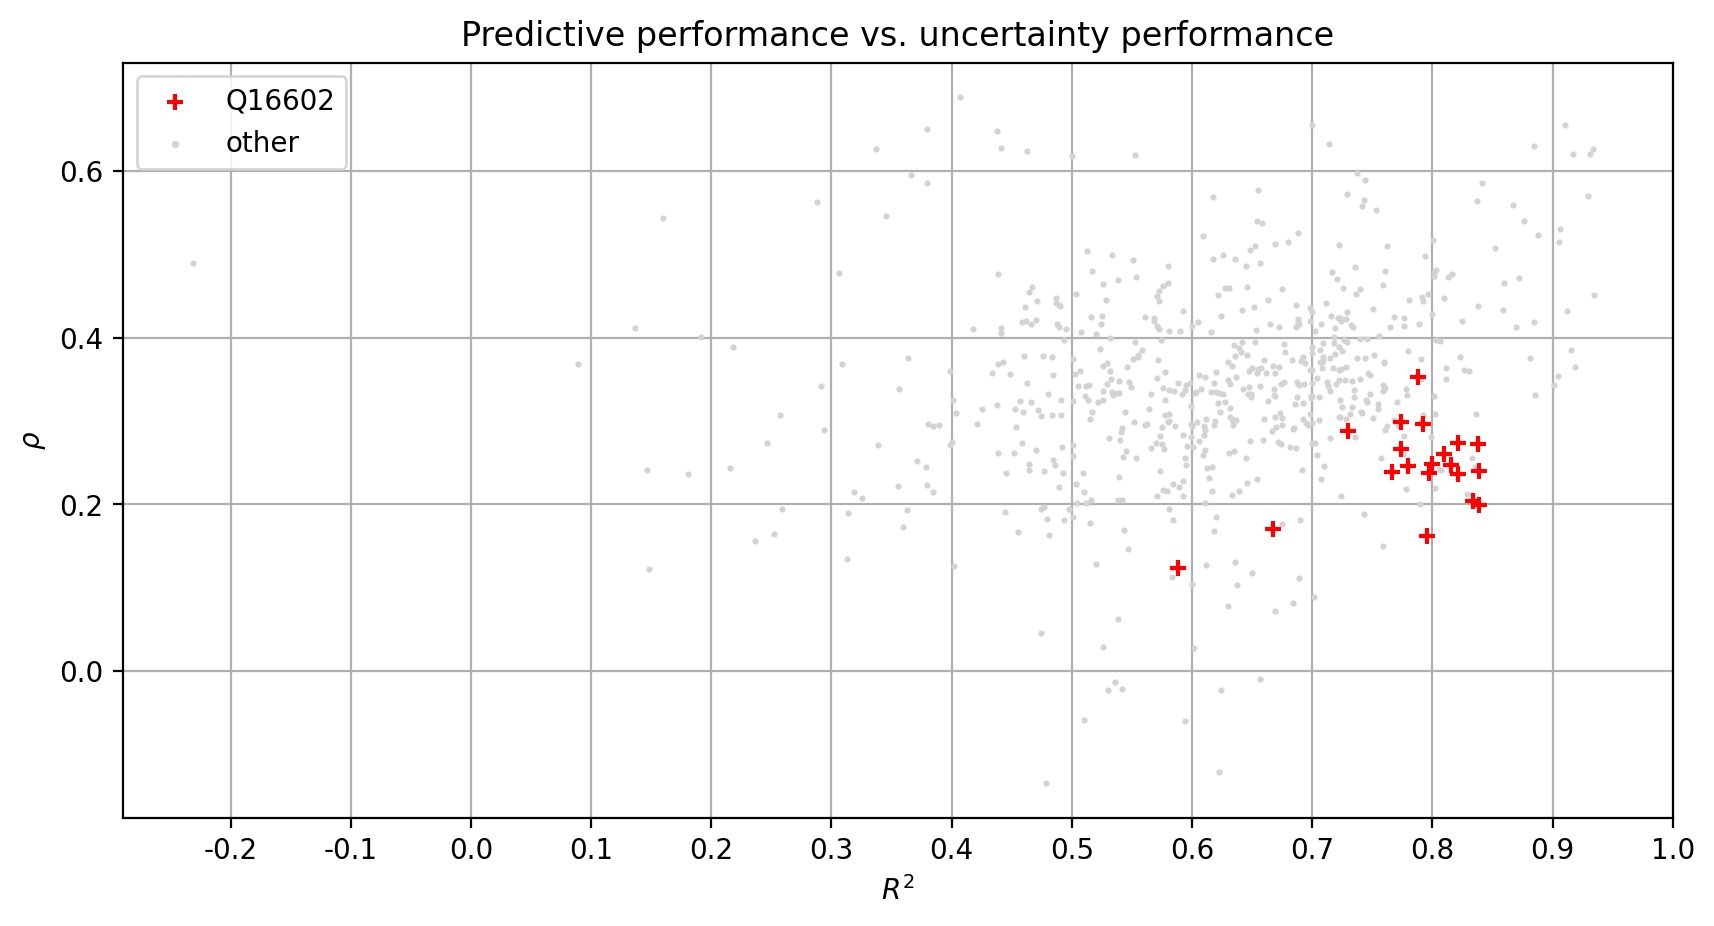

In [17]:
selected_dataset = 'Q16602'
selected_dataset_name = 'Q16602'

plt.figure(figsize=(10, 5))
plt.grid(zorder=1000)
for i, name in enumerate(dataset_names):
    name_subset = complete_overview[complete_overview['name'] == name]
    if name == selected_dataset:
        plt.scatter(name_subset['r2'], name_subset['rho'], s=30, zorder=101, color='red', marker='+', label=selected_dataset_name)
    else:
        plt.scatter(name_subset['r2'], name_subset['rho'], s=1.5, zorder=100, color='lightgrey')
plt.scatter([], [], s=2.5, zorder=100, color='lightgrey', label='other')
plt.xlabel(r'$R^2$')
plt.xticks(np.arange(-.2, 1.1, .1), [f'{val:.1f}' for val in np.arange(-.2, 1.1, .1)])
plt.ylabel(r'$\rho$')
plt.title('Predictive performance vs. uncertainty performance')
plt.legend()
plt.savefig(PLOT_FOLDER+'overview_Q16602.pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()

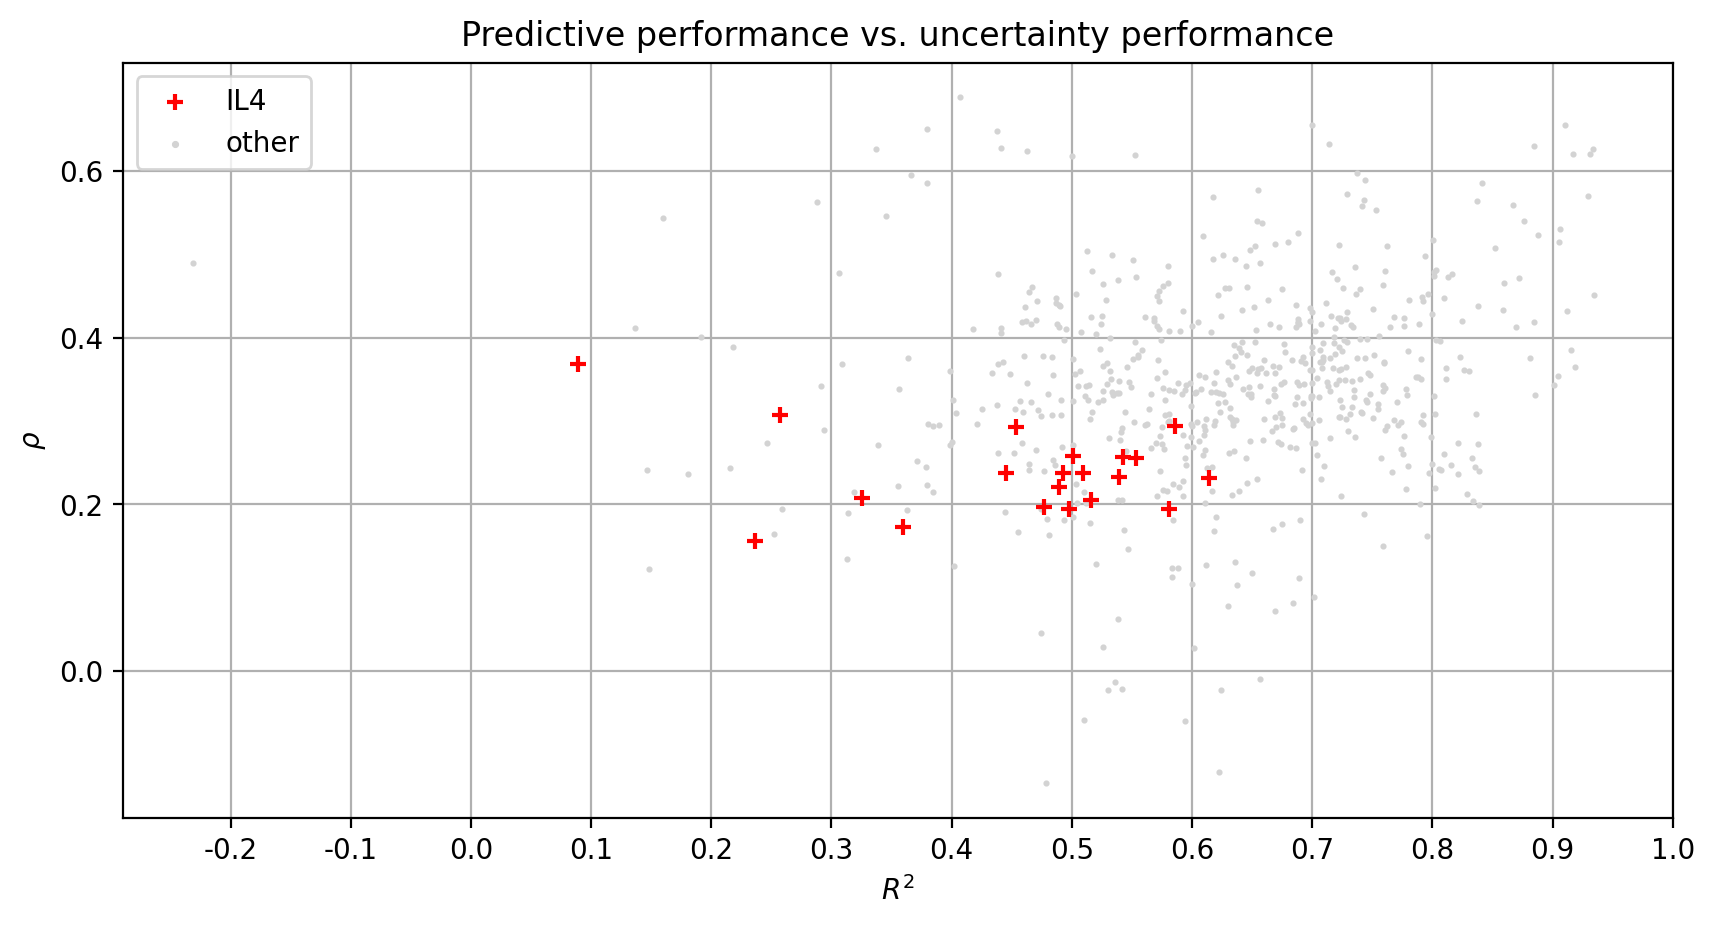

In [18]:
selected_dataset = 'IL4'
selected_dataset_name = 'IL4'

plt.figure(figsize=(10, 5))
plt.grid(zorder=1000)
for i, name in enumerate(dataset_names):
    name_subset = complete_overview[complete_overview['name'] == name]
    if name == selected_dataset:
        plt.scatter(name_subset['r2'], name_subset['rho'], s=30, zorder=101, color='red', marker='+', label=selected_dataset_name)
    else:
        plt.scatter(name_subset['r2'], name_subset['rho'], s=1.5, zorder=100, color='lightgrey')
plt.scatter([], [], s=2.5, zorder=100, color='lightgrey', label='other')
plt.xlabel(r'$R^2$')
plt.xticks(np.arange(-.2, 1.1, .1), [f'{val:.1f}' for val in np.arange(-.2, 1.1, .1)])
plt.ylabel(r'$\rho$')
plt.title('Predictive performance vs. uncertainty performance')
plt.legend()
plt.savefig(PLOT_FOLDER+'overview_IL4.pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()

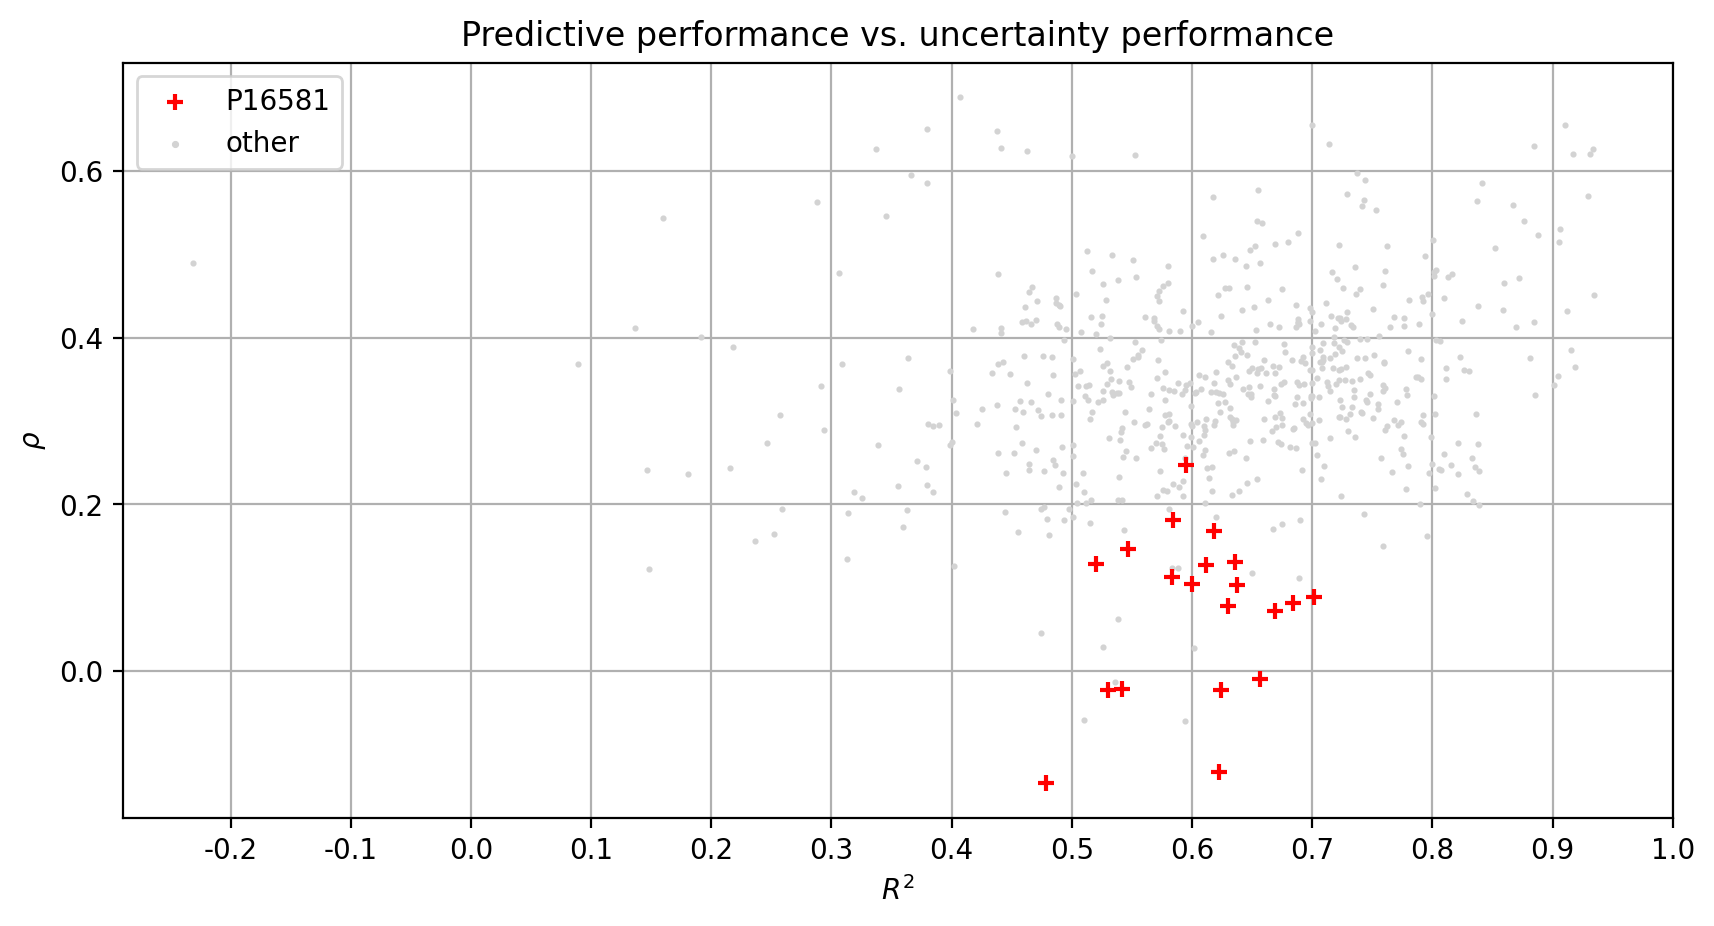

In [19]:
selected_dataset = 'P16581'
selected_dataset_name = 'P16581'

plt.figure(figsize=(10, 5))
plt.grid(zorder=1000)
for i, name in enumerate(dataset_names):
    name_subset = complete_overview[complete_overview['name'] == name]
    if name == selected_dataset:
        plt.scatter(name_subset['r2'], name_subset['rho'], s=30, zorder=101, color='red', marker='+', label=selected_dataset_name)
    else:
        plt.scatter(name_subset['r2'], name_subset['rho'], s=1.5, zorder=100, color='lightgrey')
plt.scatter([], [], s=2.5, zorder=100, color='lightgrey', label='other')
plt.xlabel(r'$R^2$')
plt.xticks(np.arange(-.2, 1.1, .1), [f'{val:.1f}' for val in np.arange(-.2, 1.1, .1)])
plt.ylabel(r'$\rho$')
plt.title('Predictive performance vs. uncertainty performance')
plt.legend()
plt.savefig(PLOT_FOLDER+'overview_P16581.pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()

In [20]:
esol_subset = complete_overview[complete_overview['name'] == 'esol']

In [21]:
esol_subset

,name,model,descriptor,r2,rho
40,esol,RF,MACCS,0.786568,0.352994
41,esol,RF,ECFC,0.714537,0.336265
42,esol,RF,RDKit,0.900873,0.343542
43,esol,RF,CDDD,0.885831,0.330906
44,esol,XGB,MACCS,0.826659,0.361510
45,esol,XGB,ECFC,0.771674,0.294849
46,esol,XGB,RDKit,0.915013,0.385226
47,esol,XGB,CDDD,0.904372,0.354567
48,esol,SVM,MACCS,0.659834,0.373706
49,esol,SVM,ECFC,0.619295,0.300576


SVM RDKit (0.852, 0.507)
Shallow ECFC (0.860, 0.240)

In [22]:
freesolv_subset = complete_overview[complete_overview['name'] == 'freesolv']

In [23]:
freesolv_subset

,name,model,descriptor,r2,rho
20,freesolv,RF,MACCS,0.876196,0.539888
21,freesolv,RF,ECFC,0.679781,0.515492
22,freesolv,RF,RDKit,0.884534,0.630657
23,freesolv,RF,CDDD,0.837055,0.563835
24,freesolv,XGB,MACCS,0.905309,0.514421
25,freesolv,XGB,ECFC,0.765062,0.412778
26,freesolv,XGB,RDKit,0.910164,0.654990
27,freesolv,XGB,CDDD,0.866895,0.559181
28,freesolv,SVM,MACCS,0.653812,0.357510
29,freesolv,SVM,ECFC,0.456777,0.323550
